# **Bay Area Water Quality Data Analysis: Minerals, Metals, and Drinkability 💧💧💧**

**Damaris Arteaga**:

- Contributions: Led the development of the dissolved oxygen (DO) prediction model by creating and processing the prediction dataframe, along with performing feature engineering on key variables like water temperature, pH, and turbidity. I designed custom functions to evaluate model performance using MAE, MSE, and R² metrics, visualize predicted vs. actual values with outlier handling through percentile clipping, and implement K-fold cross-validation for robust model validation. Additionally, I analyzed and documented the results of the DO prediction for a week-ahead forecast, ensuring clear communication of key insights in the Forecasting and Predictive Modeling section of the final report, as well as other content for the final notebook for DO prediction tasks and results.

- Hours Contributed: 20

**Nidhi Nayak**:

- Contributions: Found a water quality dataset & performed all EDA on the pH modeling prediction. Wrote a function to simplify visualizing prediction work (check_models). Performed experimental feature selection analysis for pH prediction problem, as well as experimental modelling. Created the slideshow and assigned slide splits for preliminary presentation, as well as final presentation. Wrote up the majority of the final notebook, split with Vishali. Created our team google drive, and took detailed notes posted to said google drive in every meeting. Was, in addition to Vishali, largely responsible for group ideation, group communication, coordinating meeting times, assembling the final notebook and deliverables, helping teammates edit their writing contributions, and ensuring everyone was meeting team-set deadlines. 

- Hours Contributed: 30

**Vishali Vallioor**: Developed the entire data pre-processing algorithm in addition to data loading from the water quality dataset. Was able to assist Timothy with creating a secondary dataset for his section. Developed 2 main functions for pH prediction: fit_model, get_Xy, and found the best target feature pair for the pH prediction and developed the predictions. Created a model able to lag the measurements and predict pH for a future date. Generated the GeoDataFrame able to give us the geographic visualizations you see throughout the notebook. Largely in charge of group project ideation (worked with Prof in class to make sure the idea was ok) and assembled this entire Python Notebook in addition to working alongside Nidhi to make sure all the writing was incorporated in.

- Hours Contributed: 30

**Timothy Zheng**:

- Contributions: Contributed largely to and finished our third prediction problem involving predicting magnesium concentrations, including data cleaning, EDA, and the actual models themselves. Helped write for parts of the final notebook, including in the conclusion and the abstract. 

- Hours Contributed: 20

![Water Quality](https://plus.unsplash.com/premium_photo-1710628263718-367b1cf5828f?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

Welcome to our final project notebook! Check out the Table of Contents, which clearly aligns everything together, in addition to all our project requirements.

***All of the parts needed in this notebook as per outlined by `FinalProjectTemplate_2024.ipynb` are in the table of contents***.

Alternatively (and preferably), you can open this on DataHub if you are not on it already by clicking on [this link](https://datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https://github.com/vishalival/eneres131-final-proj&urlpath=tree/eneres131-final-proj/final_notebook_final.ipynb), since this is uploaded onto a Git Repo we collaborated on. Also, you can click out our repository here: [GitHub Project Repo](https://github.com/vishalival/eneres131-final-proj). Thanks :D

---

This is a linked Table of Contents! You can click on anything and it'll link you directly to its section. We learned how to do it using this [reference](https://www.docstomarkdown.pro/create-a-table-of-contents-in-markdown/).

# Table of Contents

1. [Abstract (5 points)](#abstract-5-points)

2. [Project Background (5 points)](#project-background-5-points)

3. [Project Objective (5 points)](#project-objective-5-points)

4. [Input Data Description (5 points)](#data-description-5-points)
   - [Step 0: An Overview of Data Information Before We Run Code](#step-0-an-overview-of-data-information-before-we-run-code)
   - [Step 1: Imports and Necessary Installs](#step-1-imports-and-necessary-installs)
   - [Step 2: Actual Dataset  (3 Data Sources)](#step-2-actual-dataset)
   - [Step 3: SGSTF of Data Source](#step-3-sgstf-of-data-source)
      - [Structure](#structure)
      - [Granularity](#granularity)
      - [Scope](#scope)
      - [Faithfulness](#faithfulness)
      - [Temporality](#temporality)

5. [Data Cleaning (10 points)](#data-cleaning-10-points)
   - [Step 1: Dropping NAs, Merging with Other Datasets, and Ensuring Proper Data Types](#step-1-dropping-nas-merging-with-other-datasets-and-ensuring-proper-data-types)
   - [Step 2: Unit Consistency](#step-2-unit-consistency)
   - [Step 3: Time Zone Consistency](#step-3-time-zone-consistency)
   - [Step 4: Feature Engineering](#step-4-feature-engineering)
   - [Step 5: Pivoting for Each Prediction Approach](#step-5-pivoting-for-each-prediction-approach)
      - [Substep 1: Metals DataFrame](#substep-1-metals-dataframe)
      - [Substep 2: pH DataFrame](#substep-2-ph-dataframe)
      - [Substep 3: Dissolved Oxygen DataFrame](#substep-3-dissolved-oxygen-dataframe)

6. [Data Summary and Exploratory Data Analysis (10 points)](#eda-10-points)
   - [EDA with Dissolved Oxygen](#eda-with-dissolved-oxygen)
   - [EDA with pH](#eda-with-ph)
   - [EDA with Magnesium](#eda-with-mag)

7. [Forecasting and Prediction Modeling (25 points)](#forecasting-and-prediction-modeling-25-points)
   - [Section 1: Function Abstracting](#section-1-function-abstracting)
   - [Section 2: Dissolved Oxygen Prediction Modeling](#section-2-dissolved-oxygen-prediction-modeling)
      - [Target Variables, Feature Variables](#target-variables-feature-variables)
      - [Modeling Decisions & Rationale: Linear Regression, Random Forests, XGBoost](#modeling-decisions--rationale-linear-regression-random-forests-xgboost)
      - [Future Predictive Modeling](#future-predictive-modeling)
   - [Section 3: pH Prediction Modeling](#section-3-ph-prediction-modeling)
      - [Target Variables, Feature Variables](#target-variables-feature-variables-1)
      - [Modeling Decisions & Rationale: OLS, Ridge, Lasso, ElasticNet](#modeling-decisions--rationale-ols-ridge-lasso-elasticnet)
      - [Future Predictive Modeling](#future-predictive-modeling-1)
      - [Direct Application to Resource Allocation Question](#direct-application-to-resource-allocation-question)
   - [Section 4: Magnesium Prediction Modeling](#section-4-magnesium-prediction-modeling)
      - [Target Variables, Feature Variables](#target-variables-feature-variables-2)
      - [Modeling Decisions & Rationale](#modeling-decisions--rationale-)

8. [Visualization](#visualization)
   - [Dissolved Oxygen Models](#dissolved-oxygen-models)
   - [pH Models](#ph-models)
   - [Magnesium Models](#magnesium-models)
   - [Consolidated Prediction Model Results: Test Errors](#all-models)

9. [Interpretation and Conclusions (20 points)](#interpretation-and-conclusions-20-points)

10. [Works Cited](#works-cited)


---

# Abstract (5 points) <a id="abstract-5-points"></a>

Water quality management is a critical issue for a populated urban area like the Bay Area, where investments in infrastructure, like water treatment plants, are essential for sustainable water sources. This project uses predictive modeling to help prioritize these investments and conservation efforts, with a focus on predicting 3 key water quality features: pH, magnesium levels, and dissolved oxygen (DO) levels. In particular, we explored the predictive relationship between these features and other water quality measurements to assess where in the Bay Area resources should be allocated most crucially. To predict pH levels, we evaluated multiple regression models, including Linear Regression, Ridge, Lasso, and Elastic Net. After comparing these models, we found that Ridge regression yielded the best performance, with an $R^2$ of 0.833. While pH itself does not directly impact human health, its influence on metal solubility and corrosion as well as its effect on aquatic ecosystems makes it an important variable for water quality monitoring. For predicting magnesium levels, we identified that sodium, calcium, and potassium are strong predictors of magnesium concentration, achieving an MSE of 13.8 with a Random Forest model. This model's performance displays the close link between magnesium levels and the broader ionic balance of water, which directly affects water hardness and treatment processes. Regarding predicting DO levels, we used key features like water temperature, turbidity, pH, year, month, and nitrate levels to apply to Linear Regression, Random Forest, and XGBoost models. We then validated these models using 5-fold cross-validation, which performed strongly and revealed zones where water quality improvements were most needed. Using our insights from all 3 prediction problems, we learned that by focusing on areas with low DO levels, high magnesium concentrations, and imbalanced pH, we can effectively prioritize investments in infrastructure and restoration efforts more effectively, ensuring that resources are allocated where they will have the greatest impact on improving water quality management across counties in the Bay Area.

---

# Project Background (5 points) <a id="project-background-5-points"></a>

The Bay Area is one of the most popular places for young individuals and families to live in California, and is home to a multitude of water bodies, including rivers, lakes, and coastal beaches, all of which play a critical role in supporting both human and wildlife populations. However, the Bay Area’s environment undoubtedly cannot keep up with its exponential urbanization and booming industrial activities , leading to a substantial challenge for maintaining water quality. Among various water quality characteristics, pH, magnesium, and dissolved oxygen (DO) levels are particularly important indicators of aquatic health and public safety. We also chose these variables as they were provided in a well-documented water quality board dataset.

**pH**, as broadly defined by the NOAA, is the negative logarithm of the hydrogen ion activity. While pH is not a direct indicator of water quality, it can still suggest the presence of certain pollutants or changes in environmental conditions, or also the presence of certain harmful metals within water. The pH of water affects the chemical processes that occur within an aquatic ecosystem, which can affect the solubility of key nutrients. pH levels that are overly acidic (too low) or overly basic (too high) can stress an environment, even killing aquatic organisms. pH levels also influence the availability of nutrients like nitrogen and phosphorus, directly affecting algal growth. Fluctuations in pH may also indicate the presence of contaminants, such as acid rain, industrial discharge, or sewage runoff, which is why the pH of water bodies is so crucial to track. 

**Magnesium** is a crucial element for aquatic life since it is key in regulating various biochemical processes. It is integral to photosynthesis as it helps regulate enzyme functions in both plant and animal cells. Magnesium levels in water also directly influence the growth of aquatic plants and the health of certain aquatic animals. Low magnesium levels can stunt plant growth, while on the other hand, high magnesium concentrations may signal industrial pollution. Monitoring magnesium levels also enables scientists to understand nutrient imbalances within our water bodies.

**Dissolved Oxygen (DO)** measures the amount of oxygen available for aquatic organisms, within water. Proper DO levels are essential for the survival of these aquatic organisms. However, fluctuations in DO can indicate problems, including but not limited to: excessive nutrient loading, algal blooms, or organic matter decomposition. Low DO levels can lead to "dead zones," areas where aquatic life cannot thrive. In the Bay Area, DO levels are influenced by various factors like water temperature, salinity, and pollution. Monitoring DO levels is extremely important to maintain a balanced and thriving ecosystem and wildlife, especially in a heavily-industrialized zone like the Bay Area.

Given the complex nature of these three water quality parameters, pH, Magnesium, and DO, it is important for environmental researchers to measure and predict their relationships over time. Basic water quality monitoring revolves around periodic sampling, which, while providing valuable data, is unable to capture the trends and variability of these parameters. By performing advanced data analysis, we can predict these feature levels with greater accuracy and speed. This can overall aid environmental researchers to make more informed decisions regarding effective water management practices.


---

# Project Objective (5 points) <a id="project-objective-5-points"></a>

The central objective of our semesterly project is, in largely, being able to develop a model that is robustly able to generate predictions for water quality-related metrics throughout the Bay Area, and develop metrics that can support the resource allocation question:

- *Based on the predicted water quality features (pH, Magnesium, and DO levels), this project will help determine where to prioritize investments in infrastructure, such as water treatment plants, drainage systems, and nitrate removal technologies, across the Bay Area, as well as restoration efforts, with the end goal being to improve water quality management.*

We aim to tackle this question through our 3 different prediction questions:

1) **Dissolved Oxygen Prediction:** Train and evaluate different models to forecast dissolved oxygen levels in the Bay Area’s aquatic ecosystems (one day into the future), using values such as Water Temperature, Turbidity, pH, Nitrate, Month, and Year, and created Lagged Features to capture temporal effects.
2) **pH Prediction**: Train and evaluate prediction models to predict pH levels within Bay Area counties (one day into the future), using historical water quality data and environmental features such as Acidity, (H+), Salinity, previous pH, Light attenuation coefficient, water temperature, and Specific conductance.
3)  **Magnesium Prediction: Magnesium Prediction**: Train prediction models to predict Magnesium levels using other mineral values such as calcium and sodium.

---

# Input Data Description (5 points) <a id="data-description-5-points"></a>

## Step 0: An Overview of Data Information Before We Run Code <a id="step-0-an-overview-of-data-information-before-we-run-code"></a>

1) **Dataset Origins**: 

For our data source, we employ the Water Quality Data Portal data source as per recommended by the GSI and Professor, the data source is found at [this link](https://www.waterqualitydata.us). Our primary region of focus is the "inner" Bay Area, and as such, we focused on filtering data for counties Alameda County (where we are :D), Contra Costa County, Santa Clara County, San Mateo County, and San Francisco County. The data were collected through a variety of different sources, primarily through the NWIS and WQX, representing the EPA and USGS, respectively. The dataset measures water characteristics, which are each individually collected by a water measurement project group run by a water organization. The WQP portal concatenates government-run water quality data sources, providing information from thousands of agencies across the US, all containing information on water quality. Some organizations collecting this dataset include the National Park Service Water Resources Division, and the California State Water Resources Control Board.

If you, *the reader*, wanted to get the same data source yourself, you would go to this [website](https://www.waterqualitydata.us), click on country and select United States, click on State and select California, click on counties and select Alameda County, Contra Costa County, Santa Clara County, San Mateo County, and San Francisco County, leave everything else as is, and download the three sources: Sample Results (physical/chemical metadata), Project Data, and Site Data Only, you would have our data sources!

2) **SGSTF of Dataset**: 

We will also go more into this. Click here to get more specific information on the SGSTF of our dataset, being able to look directly at the dataset.
- *Structure*: Dataset is structured in a "melted" format, where instead of each column representing a characteristic, you must PIVOT on the DataFrame in order to get more information about it. 
- *Granularity*: Our dataset has a high level of granularity due to each row corresponding to a single water quality measurement for a specific `ActivityIdentifier`. This structure provides very, very detailed information for each characteristic (`CharacteristicName`) and its corresponding value (`ResultMeasureValue`).
- *Scope*: Concerned with the Bay Area counties Alameda County (where we are :D), Contra Costa County, Santa Clara County, San Mateo County, and San Francisco County, the inner Bay Area counties.
- *Temporality*: Goes all the way back from 1977 to 2023, with temporality granularity going down to the date and time, providing all the way down to minutes.
- *Faithfulness*: The dataset is collected through reputable sources by both the USGS and EPA, both largely-funded governmental organizations providing envirionmental-related information. The data is collected by research groups directly reporting to this government board, so it is a very trustworthy source.

3) **Data Fields we will be using**: 

More will come as you scroll down more (because we haven't cleaned data yet here), but the target variables and the overall data we will be using lies within the columns, `CharacteristicName` and `ResultMeasureValue`. These are the actual data fields we will use, plus other ones include `ActivityIdentifier` to get the unique ID of the specific activity of measurement, and `ActivityStartDate` plus `ActivityStartTime/Time` to get the specific time in space. Also `"ActivityLocationIdentifier` for us to be able to do interesting GeoPandas plots by extracting the longitude and latitude.

*Small Note*: We also use a `ca_counties` shapefile in order to generate GeoDataFrame plots, giving us the bounds within California. This is obtained from this [California open data source](https://data.ca.gov/dataset/ca-geographic-boundaries). However, we won't be discussing it much here since it's purely used for EDA and plotting purposes, not analysis.

## Step 1: Imports and Necessary Installs <a id="step-1-imports-and-necessary-installs"></a>

Run the following cell to install and import all required libraries. We consolidated all of our zips and pip installs here for clarity :). It is a lot!!

In [1]:
# Run the following cell for all imports/libraries.

!pip install xgboost
import pandas as pd
import zipfile
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import randint 

import sklearn

Here we have defined a central random state for usage. Throughout the entire Python notebook, we use a bunch of randomly generated train and test datasets. We set this to 131 in honor of ENERES 131 the class name :) but feel free to change. Purely here due to replicability!

In [2]:
CENTRAL_RANDOM_STATE = 131

## Step 2: Actual Dataset (3 Data Sources) <a id="step-2-actual-dataset"></a>
 

We merge three different datasets here. We merge the *actual sampling results dataset*, the *project information dataset*, and the *sampling location dataset*. This allows us to gain more information for EDA and specifically the organization developing and obtaining the results.

You will now see the following steps we take to load in and merge these three data sources.

**Dataset 1: Actual Sampling Results Dataset**

This is a very massive .csv file, around 300 MB of data! We did not want to overwhelm the bcourses submission, so we decided to compress it into a zipfile. When you read in the following cell, you will be using the ZipFile module in order to do so.

After zipping, we filter for relevant columns. Initially, the dataset contains a massive amount of columns, the majority of which are Null values. As such, we filter for only the relevant columns we will use for our analysis. Will take around 12 seconds to run.

**QUICK NOTE TO THE GRADER**: If the cell below errors and DOES NOT RUN or crashes your kernel (as it has happened to some team members), you can instead proceed by running the following lines of code instead. They will load the fully cleaned and (much smaller file size) DataFrames. However, you will have to skip running the data pre-processing section here and jump to [Data Summary and Exploratory Data Analysis (10 points)](#eda-10-points) instead, but EVERYTHING ELSE should run fine. These files are in the zip file submitted/git repo so it WILL work fine.

Make a new cell, run and load these DataFrames (alternatively):

`filtered_do_df = pd.read_csv("datasets_in_case_2/do_pivoted_final.csv")`

`final_data_metals = pd.read_csv("datasets_in_case_2/final_data_metals.csv")`

`final_data_wq = pd.read_csv("datasets_in_case_2/final_wq.csv")`

In [3]:
# We are using a zipfile unzipper in order to read this csv. This is a really really massive dataset so we have to do it this way (or else we can't submit it)

# Data Source 1: Actual Sampling Results

with zipfile.ZipFile("final_data/final_csv_wq_105.csv.zip", 'r') as z:
    csv_file_name = [file for file in z.namelist()][0]

    with z.open(csv_file_name) as f:
        df_data_info = pd.read_csv(f, low_memory=False)

filtered_df = df_data_info[[
    "OrganizationIdentifier", 
    "ActivityIdentifier",
    "ActivityStartDate", 
    "ActivityStartTime/Time",	
    "ActivityStartTime/TimeZoneCode",
    "ActivityEndDate", 
    "CharacteristicName", 
    "ResultMeasureValue",
    "ResultMeasure/MeasureUnitCode", 
    "MeasureQualifierCode",
    "ResultStatusIdentifier",
    "ProjectIdentifier",
    "MonitoringLocationIdentifier"
    
]]

filtered_df.head()

,OrganizationIdentifier,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,ProjectIdentifier,MonitoringLocationIdentifier
0,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,"Temperature, water",15.4,deg C,NaN,Historical,NaN,USGS-374336122201201
1,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,Salinity,33.0,ppth,NaN,Historical,NaN,USGS-374336122201201
2,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,"Temperature, water",17.4,deg C,NaN,Historical,NaN,USGS-374336122201201
3,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,Salinity,30.0,ppth,NaN,Historical,NaN,USGS-374336122201201
4,USGS-CA,nwisca.01.97810785,1978-06-13,06:12:00,PDT,NaN,"Temperature, water",15.5,deg C,NaN,Historical,NaN,USGS-374336122201201


**Dataset 2: Project Information Dataset**

This is the Project Information dataset, containing information on projects, which is helpful for us since we want to match the sampling results to their respective projects and site id. It's not as massive so we didn't zip it up :D

In [4]:
df_project = pd.read_csv("final_data/project_final_to_use.csv", low_memory=False)

df_project.head()

,OrganizationIdentifier,OrganizationFormalName,ProjectIdentifier,ProjectName,ProjectDescriptionText,SamplingDesignTypeCode,QAPPApprovedIndicator,QAPPApprovalAgencyName,ProjectFileUrl,ProjectMonitoringLocationWeightingUrl
0,11NPSWRD_WQX,National Park Service Water Resources Division,EUON0001,Spring Schedule Data Sheet from 1980 in NPS-WRD,Data are from a spring owned by the National P...,NaN,N,NaN,NaN,NaN
1,CEDEN,California State Water Resources Control Board,RWB2_TMDL_HMB_2019,RWB2 Half Moon Bay Pathogen TMDL Study 2019,RWB2 Half Moon Bay Pathogen TMDL Study 2019,NaN,NaN,NaN,NaN,NaN
2,NARS_WQX,EPA National Aquatic Resources Survey (NARS),NARS_NRSA2008_2009,National Rivers and Streams Assessment,National Aquatic Resource Surveys (NARS) 2008-...,NaN,NaN,NaN,NaN,NaN
3,CEDEN,California State Water Resources Control Board,SWB_SPoT_2010,Statewide Stream Pollution Trends Study 2010,Stream Pollution Trends Study,NaN,NaN,Not Recorded,NaN,NaN
4,CEDEN,California State Water Resources Control Board,SJC_WY15_Q1,"SJC, Order R5-2014-0029, Jun 1st 2015, WY15, Q1",San Joaquin County and Delta Water Quality Coa...,NaN,NaN,NaN,NaN,NaN


**Dataset 3: Site Information Dataset**

This is the Site Information dataset, containing information on sites, which is helpful since we need the latitude/longitude in order to assess where these measurements are taken! No need for zipping again :)

In [5]:
df_site = pd.read_csv("final_data/station_final_to_use.csv", low_memory=False)

df_site.head()

,OrganizationIdentifier,OrganizationFormalName,MonitoringLocationIdentifier,MonitoringLocationName,MonitoringLocationTypeName,MonitoringLocationDescriptionText,HUCEightDigitCode,DrainageAreaMeasure/MeasureValue,DrainageAreaMeasure/MeasureUnitCode,ContributingDrainageAreaMeasure/MeasureValue,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,USGS-CA,USGS California Water Science Center,USGS-11152900,CEDAR C NR BELL STATION CA,Stream,NaN,18060002.0,12.80,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,USGS California Water Science Center,USGS-11153000,PACHECO C NR DUNNEVILLE CA,Stream,NaN,18060002.0,146.00,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,USGS California Water Science Center,USGS-11153050,PACHECO C TRIB NR DUNNEVILLE CA,Stream,NaN,18060002.0,0.17,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,USGS California Water Science Center,USGS-11153470,LLAGAS C AB CHESBRO RES NR MORGAN HILL CA,Stream,NaN,18060002.0,9.63,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,USGS California Water Science Center,USGS-11153480,CHESBRO RES NR MORGAN HILL CA,"Lake, Reservoir, Impoundment",NaN,18060002.0,19.30,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


## Step 3: SGSTF of Data Source <a id="step-3-sgstf-of-data-source"></a>

### Structure <a id="structure"></a>

Our dataset is very, very unique and different from the datsets used in class in the sense that it is like a *melted* DataFrame, or a *long* DataFrame. Specifically, instead of having distinct columns for each variable (e.g., Temperature, Salinity, other water quality characteristics), the data is represented as a stacked table the column, `ActivityIdentifier`, indexing an individual measurement. This means that (if you look below), the first 2 rows, both with `ActivityIdentifier` being nwisca.01.97810617, but with different `CharacteristicName` columns, means that these two were measured together. The temperature and salinity of this specific water region is measured both together here at the same time. This is efficient for the Water Quality portal, as it allows the data to be very tidy and neat, and ready for someone to easily export specifically only the Characteristics they are interested in. It is not an unstructured data source like how we talked about in lecture for JSON and XML, it is a *tabular* data source. We eventually pivot the DataFrame to convert it from this long structure to a short structure, with each column being the unique characteristic.

In [6]:
filtered_df[["ActivityIdentifier", "CharacteristicName", "ResultMeasureValue"]].head()

,ActivityIdentifier,CharacteristicName,ResultMeasureValue
0,nwisca.01.97810617,"Temperature, water",15.4
1,nwisca.01.97810617,Salinity,33.0
2,nwisca.01.97810826,"Temperature, water",17.4
3,nwisca.01.97810826,Salinity,30.0
4,nwisca.01.97810785,"Temperature, water",15.5


### Granularity <a id="granularity"></a>



To answer the questions, how is data aggregated, do all records represent the same level of aggregation, and what is the temporality of the dataset - we need to take a look at the DataFrame here itself. Simply put, our dataset exhibits a LOT of granularity because each row corresponds to a single water quality measurement for a specific `ActivityIdentifier`. `ResultMeasureValue` columns provide the measured value for specific water quality characteristics such as temperature, salinity, and specific conductance, among others, which we will see soon later. Also, it goes into detail on the Activity Time, providing time to the exact seconds of when an activity occured.

In [7]:
filtered_df[["ActivityIdentifier", "CharacteristicName", "ResultMeasureValue", "ActivityStartDate", "ActivityStartTime/Time"]].head()

,ActivityIdentifier,CharacteristicName,ResultMeasureValue,ActivityStartDate,ActivityStartTime/Time
0,nwisca.01.97810617,"Temperature, water",15.4,1977-11-09,13:20:00
1,nwisca.01.97810617,Salinity,33.0,1977-11-09,13:20:00
2,nwisca.01.97810826,"Temperature, water",17.4,1978-09-19,13:52:00
3,nwisca.01.97810826,Salinity,30.0,1978-09-19,13:52:00
4,nwisca.01.97810785,"Temperature, water",15.5,1978-06-13,06:12:00


### Scope <a id="scope"></a>

The dataset covers water quality measurements collected from various counties within the Bay Area, specifically:

- Alameda County
- Contra Costa County
- Santa Clara County
- San Mateo County
- San Francisco County
These counties represent the inner Bay Area, which is the main focus for this project. The data includes measurements for various physical and chemical water quality characteristics across numerous sites, in addition to site information and project information. 

### Temporality <a id="temporality"></a>

The dataset has a temporal dimension, as each water quality measurement is associated with a specific `ActivityStartDate` and sometimes `ActivityStartTime`, although for most rows, this value is Null. The dataset goes all the way back from 1977 to 2023, with different dataset sections providing us more specific details on short-term events, but also giving us ways to analyze long-term trends in water quality across the Bay Area.

### Faithfulness <a id="faithfulness"></a>

The dataset is sourced from reputable and well-established governmental organizations, including:
- USGS (United States Geological Survey)
- EPA (Environmental Protection Agency)

We have checked the dataset for consistent values, violations of obvious dependencies, and falsified data, and have found none. The data is collected from a ENERES 131-supported trustworthy governmental source. One of the first issues we had were data inconsistencies which we soon realized were due to us not properly checking for unit consistency (for example, one row would have water depth measured in feet and another in inches, so we convert this in the data pre-processing steps.)


---

# Data Cleaning (10 points) <a id="data-cleaning-10-points"></a>

## Step 1: Dropping NAs, Merging with Other Datasets, and Ensuring Proper Data Types <a id="step-1-dropping-nas-merging-with-other-datasets-and-ensuring-proper-data-types"></a>

This is a very, very important step for our analysis. Here, we do 4 important steps:

1) Dropping all nans in the column name, `ResultMeasureValue`, this is because this is the row that *actually* contains the measurements, and we don't want any rows in our datasets having Null measurements.
2) Left merging the actual sampling results dataset on the project dataset. The reason we employ a left merge is to not actually get rid of the underlying results (we care more about the results than petty project information).
3) Left merging the actual sampling results dataset on the sampling site dataset. The reason we employ a left merge is to not actually get rid of the underlying results, and now we get information on each location.
4) Finally, ensuring that the column `ResultMeasureValue` has only numeric values.

In [8]:
# Data Cleaning to drop Nans, and merging

filtered_df = filtered_df.dropna(subset=["ResultMeasureValue"])
filtered_df_joined = filtered_df.merge(df_project, how = "left", left_on = "ProjectIdentifier", right_on = "ProjectIdentifier")
filtered_df_joined = filtered_df_joined.merge(df_site, how = "left", left_on = "MonitoringLocationIdentifier", right_on = "MonitoringLocationIdentifier")
filtered_df_joined['ResultMeasureValue'] = pd.to_numeric(filtered_df_joined['ResultMeasureValue'], errors='coerce')
filtered_df_joined.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,"Temperature, water",15.4,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,Salinity,33.0,ppth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,"Temperature, water",17.4,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,Salinity,30.0,ppth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,nwisca.01.97810785,1978-06-13,06:12:00,PDT,NaN,"Temperature, water",15.5,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


## Step 2: Unit Consistency <a id="step-2-unit-consistency"></a>

This is another very important, but super super annoying step. One issue we realized is that each characteristic (water quality measurement index, like for example pH, water temp) has multiple units! This means, one row for temperature could be in ºC, and another could be in ºF which is not what we want for our analysis (we need unit consistency). These next steps are where we employ a function in order to ensure unit consistency for the variables we care about.

First, run the first cell to see how many unique units there are for each water quality characteristic.

In [9]:
# A look at how many different unit measurements there are to measure a certain Characteristic!

unit_check = filtered_df_joined.groupby("CharacteristicName")["ResultMeasure/MeasureUnitCode"].apply(lambda x: x.dropna().unique())

multiple_units = unit_check[unit_check.apply(len) > 1]

print("Multiple unit types of measurement for each characteristic :( ):")
lim_val = 10
limit = 0
for characteristic, units in multiple_units.items():
    if limit >= lim_val:
        break
    print(characteristic + ": " + units)
    limit = limit + 1

Multiple unit types of measurement for each characteristic :( ):
['.alpha.-Hexachlorocyclohexane: ug/L'
 '.alpha.-Hexachlorocyclohexane: pg/L']
['.beta.-Hexachlorocyclohexane: % recovery'
 '.beta.-Hexachlorocyclohexane: ug/L' '.beta.-Hexachlorocyclohexane: pg/L']
['.delta.-Hexachlorocyclohexane: ug/L'
 '.delta.-Hexachlorocyclohexane: pg/L']
['1,1,1-Trichloroethane: ug/l' '1,1,1-Trichloroethane: ug/L']
['1,1-Dichloroethane: ug/l' '1,1-Dichloroethane: ug/L']
['1,2,4-Trimethylbenzene: ug/l' '1,2,4-Trimethylbenzene: ug/L']
['1,3,4,6,7,8-Hexahydro-4,6,6,7,8,8-hexamethylcyclopenta[g]-2-benzopyran: ug/l'
 '1,3,4,6,7,8-Hexahydro-4,6,6,7,8,8-hexamethylcyclopenta[g]-2-benzopyran: ug/kg']
['1-(3,4-dichlorophenyl)-3-methyl urea: ng/l'
 '1-(3,4-dichlorophenyl)-3-methyl urea: ng/L'
 '1-(3,4-dichlorophenyl)-3-methyl urea: ug/L']
['1-Methylnaphthalene: ug/kg' '1-Methylnaphthalene: pg/L'
 '1-Methylnaphthalene: ng/g' '1-Methylnaphthalene: ug/L']
['1-Methylphenanthrene: pg/L' '1-Methylphenanthrene: ng/g'

Now, to deal with this annoying problem, we wrote a function named `unit_convert` that essentially loops through our big DataFrame, and for a given characteristic, converts all rows of that characteristic from a given "before" unit, to a given "after" unit, given a lambda `conversion_function` you have to specify. This essentially abstracts the entire process of this unit conversion information, since we need to look more thoroughly up above at our unit incosistencies and find out the rules ourselves by looking up some basic scientific conversion information.

In [10]:
def unit_convert(df, col_units, col_measure, unit_before, unit_after, conversion_function, char_column, char_to_convert = None):
    '''
    Function Author: Vishali Vallioor
    Converts units of measurement for specified rows in a DataFrame given. Used in this case for WQ dataset.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data to convert.
        col_units (str): Column name for units of measurement.
        col_measure (str): Column name for measure values.
        unit_before (str): Unit to convert from.
        unit_after (str): Unit to convert to.
        conversion_function (function): Function to apply for the conversion. Can use lambda!
        char_column (str): Column name for characteristic filtering.
        char_to_convert (list or None): Specific characteristics to filter for conversion.

    Returns:
        None: Modifies the DataFrame in place.
    """
    '''
    if char_to_convert is not None:
        row_indices_to_convert = (
            (df[char_column].isin(char_to_convert)) &
            (df[col_units] == unit_before)
        )

    row_indices_to_convert = df[col_units] == unit_before

    df.loc[row_indices_to_convert, col_measure] = conversion_function(df.loc[row_indices_to_convert, col_measure])
    df.loc[row_indices_to_convert, col_units] = unit_after

Now we apply the function into action! At the top, just naming the arguments so we don't have to repeat the long names again and again. There's a bunch of different conversion rules down here, and I outline which column and which unit conversion I'm using right above in comments. 

I used the source, `https://unitslab.com/` to find out these unit conversion rules, and convert them to lambda functions!

In some cases, there are multiple characteristics to convert, and in some, it's just a single one. In some cases, it's run on the entire DataFrame.

In [11]:
df_arg = filtered_df_joined.copy()
unit_arg = "ResultMeasure/MeasureUnitCode"
meas_arg = "ResultMeasureValue"
char_arg = "CharacteristicName"


# ug/L to mg/kg case scenario
# Assumption: water has a density of 1 kg/L
unit_convert(df_arg, unit_arg, meas_arg, "ug/l", "mg/kg", (lambda x: x/1000), char_arg)

# % to mg/kg case scenario
# Multiplying by 10,000
unit_convert(df_arg, unit_arg, meas_arg, "%", "mg/kg", (lambda x: x*1000), char_arg)

# ng/L to mg/kg case scenario
unit_convert(df_arg, unit_arg, meas_arg, "ng/l", "mg/kg", lambda x: x / 1_000_000, char_arg)

# ft to m case scenario
# Multiplying by 0.3048
unit_convert(df_arg, unit_arg, meas_arg, "ft", "m", lambda x: x * 0.3048, char_arg)

# ft3/s to m3/s case scenario
# Multiplying by 0.0283168
unit_convert(df_arg, unit_arg, meas_arg, "ft3/s", "m3/sec", lambda x: x * 0.0283168, char_arg)

# Multiplying by 1.29 (example molecular weight conversion)
unit_convert(df_arg, unit_arg, meas_arg, "mg/l as N", "mg/l NH4", lambda x: x * 1.29, char_arg)


unit_convert(df_arg, unit_arg, meas_arg, "mg/kg", "ug/kg", lambda x: x * 1000, char_arg, char_to_convert=["Fipronil Sulfone", "Fluoranthene", "Pyrene"])

unit_convert(df_arg, unit_arg, meas_arg, "mg/l", "mg/kg", lambda x: x * 1, char_arg, char_to_convert=["Calcium", "Magnesium", "Potassium", "Sodium"])

unit_convert(df_arg, unit_arg, meas_arg, "ug/kg", "mg/kg", lambda x: x / 1000, char_arg, char_to_convert=[
    "Azoxystrobin", "Benzo[a]pyrene", "Clothianidin", "Dithiopyr", "Diuron",
    "Etoxazole", "Fipronil Sulfide", "Fluridone", "Hexazinone", "Methoxyfenozide",
    "Oxyfluorfen", "Pendimethalin", "Piperonyl butoxide", "Propiconazole",
    "Tin", "Uranium"])

# Multiplying by 1.29 (example molecular weight conversion, for both.)
unit_convert(df_arg, unit_arg, meas_arg, "mg/l NH4", "mg/l asNO3", lambda x: x * 4.43, char_arg, char_to_convert=["Nitrate"])

# Convert % by wt to mg/kg for Organic Carbon
unit_convert(df_arg, unit_arg, meas_arg, "% by wt", "mg/kg", lambda x: x * 10000, char_arg, char_to_convert=["Organic carbon"])

# Convert mg/l as PO4 to mg/l as P for Orthophosphate
unit_convert(df_arg, unit_arg, meas_arg, "mg/l asPO4", "mg/l as P", lambda x: x * 0.326, char_arg, char_to_convert=["Orthophosphate"])

# Convert % saturation to mg/l for Oxygen
unit_convert(df_arg, unit_arg, meas_arg, "% saturatn", "mg/l", lambda x: x * 0.1, char_arg, char_to_convert=["Oxygen"])

# Standardize the units for the SSC
unit_convert(df_arg, unit_arg, meas_arg, "mg/l", "mg/kg", lambda x: x, char_arg, char_to_convert=["Suspended Sediment Concentration (SSC)"])

# Convert solids to consistent unit, using multipler of 73558.8
unit_convert(df_arg, unit_arg, meas_arg, "tons/ac ft", "mg/l", lambda x: x * 73558.8, char_arg, char_to_convert=["Total dissolved solids"])

# Consistent units for UV
unit_convert(df_arg, unit_arg, meas_arg, "units/cm", "L/mgDOC*m", lambda x: x, char_arg, char_to_convert=["UV 254"])

# Convert mg/l to mg/kg for "Organic carbon" minority case
unit_convert(df_arg, unit_arg, meas_arg, "mg/l", "mg/kg", lambda x: x / 1000, char_arg, char_to_convert=["Organic carbon"])

# Standardize mg/kg as P to mg/kg for Phosphorus
unit_convert(df_arg, unit_arg, meas_arg, "mg/l as P", "mg/kg", lambda x: x / 1000, char_arg, char_to_convert=["Phosphorus"])

# Methane and Nitrogen: Convert cm3/g STP to cm3/g @STP
unit_convert(df_arg, unit_arg, meas_arg, "cm3/g STP", "cm3/g @STP", lambda x: x, char_arg, char_to_convert=["Methane", "Nitrogen"])

# Organic carbon: Convert g/kg to mg/kg
unit_convert(df_arg, unit_arg, meas_arg, "g/kg", "mg/kg", lambda x: x * 1000, char_arg, char_to_convert=["Organic carbon"])

# Turbidity: Convert FNU to NTU. no need to charge or mult, since alr same.
unit_convert(df_arg, unit_arg, meas_arg, "FNU", "NTU", lambda x: x, char_arg, char_to_convert=["Turbidity"])

# Uranium: Convert pCi/L to mg/kg
unit_convert(df_arg, unit_arg, meas_arg, "pCi/L", "mg/kg", lambda x: x * 0.000000034, char_arg, char_to_convert=["Uranium"])

# Colifom Values Normalization
unit_convert(df_arg, unit_arg, meas_arg, "cfu/100mL", "MPN/100mL", lambda x: x * 1, char_arg, char_to_convert=["Fecal Coliform", "Total Coliform", "Enterococcus"])

Finally, now that the conversions are done, we take a copy of `df_arg`, which we employed as a copy of the DataFrame for conversion, and set it back to the dataset we're using, `filtered_df_unit_converted`. On to the next data pre-processing step!!

In [12]:
filtered_df_unit_converted = df_arg.copy()
filtered_df_unit_converted.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,"Temperature, water",15.4,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,Salinity,33.0,ppth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,"Temperature, water",17.4,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,Salinity,30.0,ppth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,nwisca.01.97810785,1978-06-13,06:12:00,PDT,NaN,"Temperature, water",15.5,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


## Step 3: Time Zone Consistency <a id="step-3-time-zone-consistency"></a>

Another annoying inconsistency we realized our dataset had was time zone inconsistency. Surprisingly enough, even though everything was collected in California, some data values even were in GMT! Here we use the `time_zone_offsets` to do all our conversions.

In [13]:
# All timezone info from https://www.timeanddate.com/time/zones

time_zone_offsets = {
    'PDT': 1,  # PDT - 1 hour more PST
    'EST': -3,  # EST - 3 hours more PST
    'EDT': -3,  # EDT - 3 hours ahead of PST (Eastern Time Zone)
    'GMT': -8,  # GMT - 8 hours ahead of PST
    'MST': -1   # MST - 1 hour ahead of PST
}

valid_indices = (
    filtered_df_unit_converted["ActivityStartTime/TimeZoneCode"].notna() &
    filtered_df_unit_converted["ActivityStartTime/Time"].notna()
)

for tz, offset in time_zone_offsets.items():
    tz_indices = valid_indices & (filtered_df_unit_converted["ActivityStartTime/TimeZoneCode"] == tz)
    
    filtered_df_unit_converted.loc[tz_indices, "ActivityStartTime/Time_PST"] = (
        pd.to_datetime(filtered_df_unit_converted.loc[tz_indices, "ActivityStartTime/Time"], format='%H:%M:%S') +
        pd.Timedelta(hours=offset)
    ).dt.strftime('%H:%M:%S') 

filtered_df_unit_converted.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName,ActivityStartTime/Time_PST
0,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,"Temperature, water",15.4,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,NaN
1,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,Salinity,33.0,ppth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,NaN
2,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,"Temperature, water",17.4,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,14:52:00
3,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,Salinity,30.0,ppth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,14:52:00
4,USGS-CA,nwisca.01.97810785,1978-06-13,06:12:00,PDT,NaN,"Temperature, water",15.5,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,07:12:00


## Step 4: Feature Engineering <a id="step-4-feature-engineering"></a>

For part of our analysis, instead of using a messy DateTime object that looks like `1977-11-09`, we wanted to extract the day, month, and weekday for further analysis. Here we use the DateTime module in order to achieve just that.

In [14]:
#feature engineering 
filtered_df_unit_converted['ActivityStartDate'] = pd.to_datetime(filtered_df_unit_converted['ActivityStartDate'], errors='coerce')
filtered_df_unit_converted['Year'] = filtered_df_unit_converted['ActivityStartDate'].dt.year
filtered_df_unit_converted['Month'] = filtered_df_unit_converted['ActivityStartDate'].dt.month
filtered_df_unit_converted['Day'] = filtered_df_unit_converted['ActivityStartDate'].dt.day
filtered_df_unit_converted['Weekday'] = filtered_df_unit_converted['ActivityStartDate'].dt.weekday
filtered_df_unit_converted['Hour'] = filtered_df_unit_converted['ActivityStartDate'].dt.hour

df_processed = filtered_df_unit_converted.copy()
df_processed.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName,ActivityStartTime/Time_PST,Year,Month,Day,Weekday,Hour
0,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,"Temperature, water",15.4,deg C,NaN,...,NaN,NaN,NaN,NWIS,NaN,1977,11,9,2,0
1,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,Salinity,33.0,ppth,NaN,...,NaN,NaN,NaN,NWIS,NaN,1977,11,9,2,0
2,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,"Temperature, water",17.4,deg C,NaN,...,NaN,NaN,NaN,NWIS,14:52:00,1978,9,19,1,0
3,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,Salinity,30.0,ppth,NaN,...,NaN,NaN,NaN,NWIS,14:52:00,1978,9,19,1,0
4,USGS-CA,nwisca.01.97810785,1978-06-13,06:12:00,PDT,NaN,"Temperature, water",15.5,deg C,NaN,...,NaN,NaN,NaN,NWIS,07:12:00,1978,6,13,1,0


Now that everything's nice and cleaned for our analysis, we won't see any inconsistencies, and we can be clearly convinced that the data won't contain problems that will prevent ourselves from doing meaningful analysis with them.

## Step 5: Pivoting for Each Prediction Approach <a id="step-5-pivoting-for-each-prediction-approach"></a>

The important thing to note with our DataFrame is that it's a bit unstructured. In a sense, we have a column called "ActivityIdentifier" which identifies a unique measurement activity, where at a certain time, at a certain location, a certain organization under a certain project obtains a certain measurement for a certain characteristic at a certain site. However, the weird thing is that every row has a column called `CharacteristicName` and `ResultMeasureValue` that tells us first which water quality characteristic it is measuring, then its value. If we want to do actual analysis, we have to find the relevant Characteristics we want, filter on them, and finally pivot on `ActivityIdentifier`. However, doing so makes the DataFrame much smaller which is why our initial dataset had to be so, so big.

### Substep 1: Metals DataFrame <a id="substep-1-metals-dataframe"></a>

In [15]:
metals_df = df_processed[df_processed["CharacteristicName"].isin(["Magnesium","Sodium","Sodium, percent total cations","Potassium","Calcium"])]

pivot_data = metals_df.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue',
    aggfunc='first'  
).reset_index()

additional_info = metals_df[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure']].drop_duplicates()

final_data_metals= pivot_data.merge(additional_info, on='ActivityIdentifier', how='left')

final_data_metals.head()

,ActivityIdentifier,Calcium,Magnesium,Potassium,Sodium,"Sodium, percent total cations",ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure
0,11NPSWRD_WQX-PRSF_WQ_EL2_20120426_L^01,NaN,89.0,NaN,NaN,NaN,PRSF_WQ,2012-04-26,13:00:00,-122.455430,37.793900
1,11NPSWRD_WQX-PRSF_WQ_EL2_20120529_L^01,NaN,85.0,NaN,NaN,NaN,PRSF_WQ,2012-05-29,13:10:00,-122.455430,37.793900
2,11NPSWRD_WQX-PRSF_WQ_TH2_20120426_L^01,NaN,72.0,NaN,NaN,NaN,PRSF_WQ,2012-04-26,12:25:00,-122.454667,37.797861
3,11NPSWRD_WQX-PRSF_WQ_TH2_20120529_L^01,NaN,47.0,NaN,NaN,NaN,PRSF_WQ,2012-05-29,12:30:00,-122.454667,37.797861
4,11NPSWRD_WQX-PRSF_WQ_TH3_20120426_L^01,NaN,50.0,NaN,NaN,NaN,PRSF_WQ,2012-04-26,12:00:00,-122.454333,37.801139


In [16]:
# Assessing our null values

final_data_metals.isnull().sum()/(final_data_metals.notnull().sum() + final_data_metals.isnull().sum())

ActivityIdentifier               0.000000
Calcium                          0.118902
Magnesium                        0.108994
Potassium                        0.474848
Sodium                           0.127287
Sodium, percent total cations    0.775152
ProjectIdentifier                0.107470
ActivityStartDate                0.000000
ActivityStartTime/Time_PST       0.756098
LongitudeMeasure                 0.000000
LatitudeMeasure                  0.000000
dtype: float64

### Substep 2: pH DataFrame <a id="substep-2-ph-dataframe"></a>

For our core prediction question, we want to focus on predicting both pH and turbidity of water, since they are directly related to water drinkability. We filter on rows containing values for the following relevant characteristics as we found from Literature, and we get the rows with those characteristics and pivot.

In [17]:
# Top features determined for water qualityu based on the following Literature:
# Summers, J. K. (2020). Water quality: Science, assessments and policy. BoD – Books on Demand. https://doi.org/10.5772/intechopen.77531 

top_features = [
    "Stream width measure",
    "Temperature, water",
    "Stream flow, instantaneous",
    "Number of sampling points",
    "Height, gage",
    "Turbidity",
    "Suspended Sediment Concentration (SSC)",
    "Suspended Sediment Discharge",
    "Temperature, air",
    "Barometric pressure",
    "Specific conductance",
    "Acidity, (H+)",
    "Oxygen",
    "pH",
    "Bed sediment particle size",
    "Refractive Index (RI)",
    "Total volatile solids",
    "Bedload sediment flux",
    "Bedload sediment particle size",
    "Organic carbon",
    "Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",
    "Ammonia and ammonium",
    "Nitrite",
    "Nitrate",
    "Orthophosphate",
    "Phosphorus",
    "Calcium",
    "Magnesium",
    "Sodium",
    "Potassium",
    "Chloride",
    "Sulfate",
    "Fluoride",
    "Silica",
    "Arsenic",
    "Barium",
    "Boron",
    "Depth",
    "Hardness, Ca, Mg",
    "Carbon dioxide",
    "Salinity",
    'Acidity, (H+)', 
    'Light attenuation coefficient', 
    'Specific conductance',
    'Total dissolved solids',
    'Dissolved oxygen (DO)', 
    'Dissolved oxygen saturation',
    'Conductivity'
]

water_quality_df = df_processed[df_processed["CharacteristicName"].isin(top_features)]

water_quality_df_pivot = water_quality_df.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue'
).reset_index()

additional_info_wq = water_quality_df[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure']].drop_duplicates()

final_data_wq = water_quality_df_pivot.merge(additional_info_wq, on='ActivityIdentifier', how='left')

final_data_wq.head()

# final_data_wq.to_csv("final_data/water_quality.csv")

,ActivityIdentifier,"Acidity, (H+)",Ammonia and ammonium,Arsenic,Barium,Barometric pressure,Bed sediment particle size,Bedload sediment flux,Bedload sediment particle size,Boron,...,"Temperature, water",Total dissolved solids,Total volatile solids,Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure
0,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,7.47,GOGA0003,1989-02-21,NaN,-122.495833,37.801158
1,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.9,NaN,NaN,NaN,7.49,GOGA0003,1989-02-21,NaN,-122.495833,37.801158
2,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.9,NaN,NaN,NaN,7.49,GOGA0003,1989-02-21,NaN,-122.495833,37.801158
3,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.9,NaN,NaN,NaN,7.50,GOGA0003,1989-02-21,NaN,-122.495833,37.801158
4,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.9,NaN,NaN,NaN,7.50,GOGA0003,1989-02-21,NaN,-122.495833,37.801158


*Now, something to look at is, even though we obtained a DataFrame with every column representing a unique water quality measurement. However, there are a lot of Nans because what we realized is that it is very very rare for an organization or project to measure more than one characteristic at a time. Usually, most organizations are only concerned with measuring 1-5 relevant characteristics for their own concern. So, when you look at the Nans, it looks pretty alarming, but the truth is we really need to filter for 1-5 relevant characteristics that are actually measured together at a single site.*

In [18]:
# Assessing our null values

final_data_wq.isnull().sum()/(final_data_wq.notnull().sum() + final_data_wq.isnull().sum())

ActivityIdentifier                                              0.000000
Acidity, (H+)                                                   0.822985
Ammonia and ammonium                                            0.989203
Arsenic                                                         0.984113
Barium                                                          0.990858
Barometric pressure                                             0.957275
Bed sediment particle size                                      0.993494
Bedload sediment flux                                           0.998472
Bedload sediment particle size                                  0.999677
Boron                                                           0.984590
Calcium                                                         0.983790
Carbon dioxide                                                  0.998724
Chloride                                                        0.956602
Conductivity                                       

### Substep 3: Dissolved Oxygen DataFrame <a id="substep-3-dissolved-oxygen-dataframe"></a>

Now we filter for everything related to the first Supporting Prediction Question,  concerned with predicting DO (Dissolved Oxygen) levels.

In [19]:
relevant_characteristics = [
    'Dissolved oxygen (DO)', 'Temperature, water', 'pH', 'Specific conductance',
    'Turbidity', 'Nitrate', 'Ammonia', 'Chlorophyll a', 'Flow'
]

do_df = df_processed[df_processed["CharacteristicName"].isin(relevant_characteristics)]

do_pivoted_df = do_df.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue'
).reset_index()

do_pivoted_df_additional = df_processed[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure', 'Year', 'Month', 'Day', 'Weekday', 'Hour'
                                ]].drop_duplicates()

do_pivoted_df_final = do_pivoted_df.merge(do_pivoted_df_additional, on='ActivityIdentifier', how='left')

do_pivoted_df_final.head()

,ActivityIdentifier,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Flow,Nitrate,Specific conductance,"Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure,Year,Month,Day,Weekday,Hour
0,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433632,NaN,NaN,9.0,NaN,NaN,49900.0,10.0,NaN,7.47,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
1,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433634,NaN,NaN,9.0,NaN,NaN,49800.0,9.9,NaN,7.49,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
2,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433635,NaN,NaN,9.0,NaN,NaN,36200.0,9.9,NaN,7.49,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
3,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433636,NaN,NaN,9.0,NaN,NaN,50000.0,9.9,NaN,7.50,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
4,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433638,NaN,NaN,8.0,NaN,NaN,36200.0,9.9,NaN,7.50,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0


Once again, just some final filtering and dropping for our Dissolved oxygen DataFrame.

In [20]:
filtered_do_df = do_pivoted_df_final.dropna(subset=['Dissolved oxygen (DO)'])
filtered_do_df.drop(columns=['Flow', 'Specific conductance', 'Ammonia', 'Chlorophyll a'], inplace=True)
filtered_do_df.head()

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_27557/1537805946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_do_df.drop(columns=['Flow', 'Specific conductance', 'Ammonia', 'Chlorophyll a'], inplace=True)


,ActivityIdentifier,Dissolved oxygen (DO),Nitrate,"Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure,Year,Month,Day,Weekday,Hour
0,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433632,9.0,NaN,10.0,NaN,7.47,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
1,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433634,9.0,NaN,9.9,NaN,7.49,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
2,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433635,9.0,NaN,9.9,NaN,7.49,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
3,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433636,9.0,NaN,9.9,NaN,7.50,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
4,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433638,8.0,NaN,9.9,NaN,7.50,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0


---

# Data Summary and Exploratory Data Analysis (10 points) <a id="eda-10-points"></a>

In this section lies all of our EDA. We framed the EDA in context of our 3 prediction questions, since we created individual small datasets pivoted on each. First, we will dive into the EDA for our Dissolved Oxygen analysis. Let's tour our Dataset!

## EDA with Dissolved Oxygen <a id="eda-with-dissolved-oxygen"></a>

First, a graph showing the data temporality in the scope of time. Looks like the range is from 1985 to 2024, when looking only at the Dissolved Oxygen dataset.

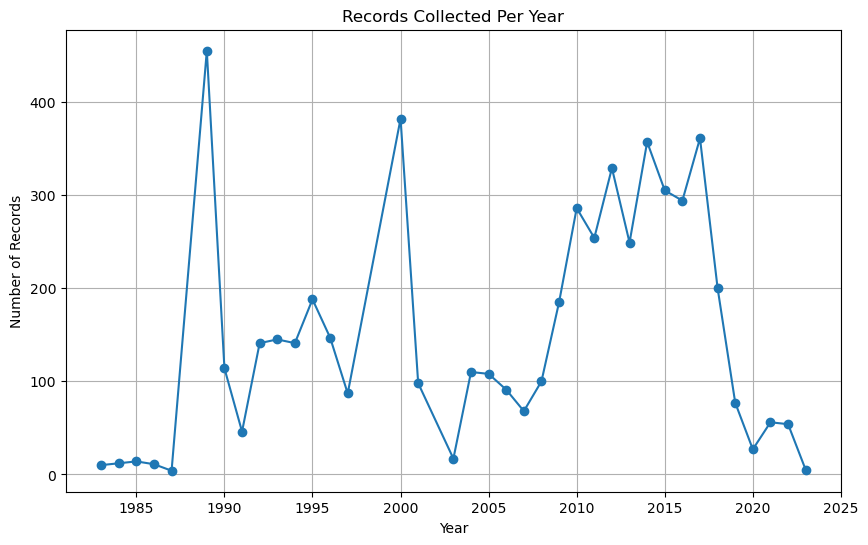

In [21]:
# A Graph going through the records collected per year for the Dissolved Oxygen DataFrame.

yearly_counts = filtered_do_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Records Collected Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

Monthly data collection trends again, but using a stacked bar plot. Lots of years here, since the temporality scope of our dataset is high.

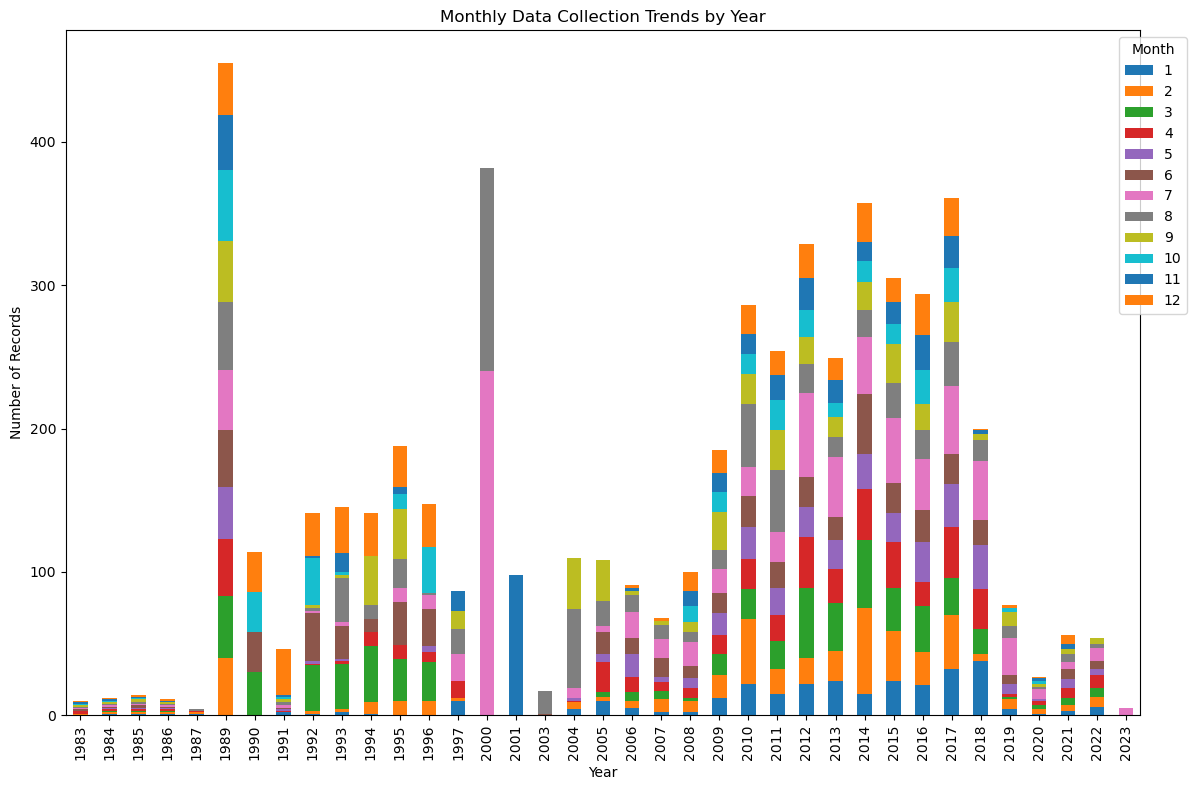

In [22]:
# A stacked bar plot of the monthly data collection trends.

monthly_counts = filtered_do_df.groupby(['Year', 'Month']).size().unstack()
monthly_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Monthly Data Collection Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Another plot here showing Dissolved Oxygen (DO) levels over time. How interesting - the dissolved oxygen levels in ~2008 seem to be very high. Seems like an interesting variable to be working with!

/Users/vishalivallioor/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vishalivallioor/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


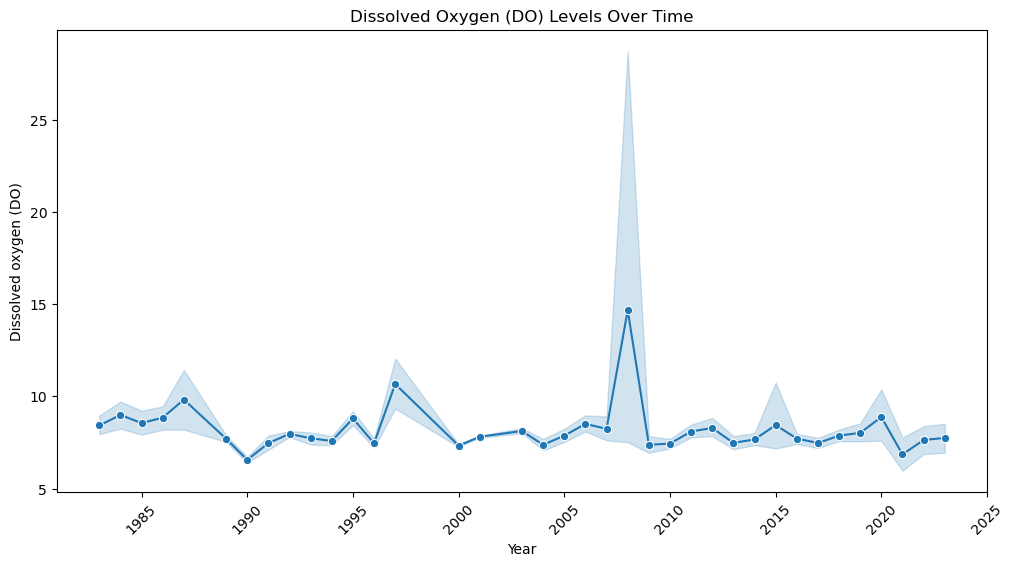

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Dissolved oxygen (DO)', data=do_pivoted_df_final, marker='o')
plt.title('Dissolved Oxygen (DO) Levels Over Time')
plt.xticks(rotation=45)
plt.show()

## EDA with pH <a id="eda-with-ph"></a>

Taking a look at the range, mean, median values of the water quality DataFrame. Before going into the analysis, we want to see the range of each of the distinct variables here. Seems like we have a lot of variables to work with!!

In [24]:
final_data_wq.describe()

,"Acidity, (H+)",Ammonia and ammonium,Arsenic,Barium,Barometric pressure,Bed sediment particle size,Bedload sediment flux,Bedload sediment particle size,Boron,Calcium,...,Suspended Sediment Discharge,"Temperature, air","Temperature, water",Total dissolved solids,Total volatile solids,Turbidity,pH,ActivityStartDate,LongitudeMeasure,LatitudeMeasure
count,12624.000000,770.000000,1133.000000,652.000000,3047.000000,464.000000,109.000000,23.000000,1099.000000,1156.000000,...,2603.000000,1956.000000,35230.000000,14443.000000,143.000000,8407.000000,27286.000000,71316,71316.000000,71316.000000
mean,0.029509,0.622868,1.226955,13.523335,752.620282,43888.826509,565.617615,3522.386957,10.003079,205.531661,...,847.199570,16.239826,15.978642,695.460800,3980.181818,26.501057,8.088608,2001-07-11 14:04:27.743563904,-121.975667,37.671001
min,0.000010,0.051432,-0.500000,0.000000,5.000000,0.000000,0.000000,14.900000,0.000000,3.000000,...,0.000000,2.500000,0.300000,0.000000,52.000000,0.000000,0.830000,1950-04-20 00:00:00,-122.521677,36.959900
25%,0.000010,0.114294,0.002000,0.025000,750.000000,2000.000000,0.180000,1000.000000,0.100000,19.000000,...,0.830000,13.500000,12.500000,210.000000,1000.000000,2.000000,7.500000,1983-03-22 00:00:00,-122.217800,37.564500
50%,0.000020,0.228588,0.004000,0.037000,750.000000,20500.000000,0.800000,1000.000000,0.130000,29.000000,...,6.200000,15.500000,15.800000,401.000000,1000.000000,5.300000,7.800000,2009-12-30 00:00:00,-121.927458,37.694800
75%,0.000040,0.478606,1.810000,0.073000,755.000000,100000.000000,5.540000,3000.000000,0.215300,64.425000,...,178.000000,18.025000,18.500000,655.000000,4000.000000,14.400000,8.100000,2015-02-17 00:00:00,-121.745800,37.829800
max,372.000000,16.515483,17.200000,693.000000,775.000000,100000.000000,60500.000000,19000.000000,800.000000,15100.000000,...,68900.000000,80.000000,222.300000,55900.000000,68000.000000,12000.000000,7397.000000,2024-01-24 00:00:00,-121.241917,38.245191
std,3.310887,1.432156,2.115095,56.193277,14.894328,43990.562895,5793.925004,5315.647549,53.700540,1012.665879,...,3505.261614,5.316937,5.654172,2506.939031,7680.133826,234.410367,45.060626,NaN,0.292136,0.267037


Plots for the Water Quality pH prediction. We employ these features here, as they are relevant and frequently used together within the model. Salinity and pH seem to have an interestingly-clustered relationship, where as salinity increases, the pH reduces in range.

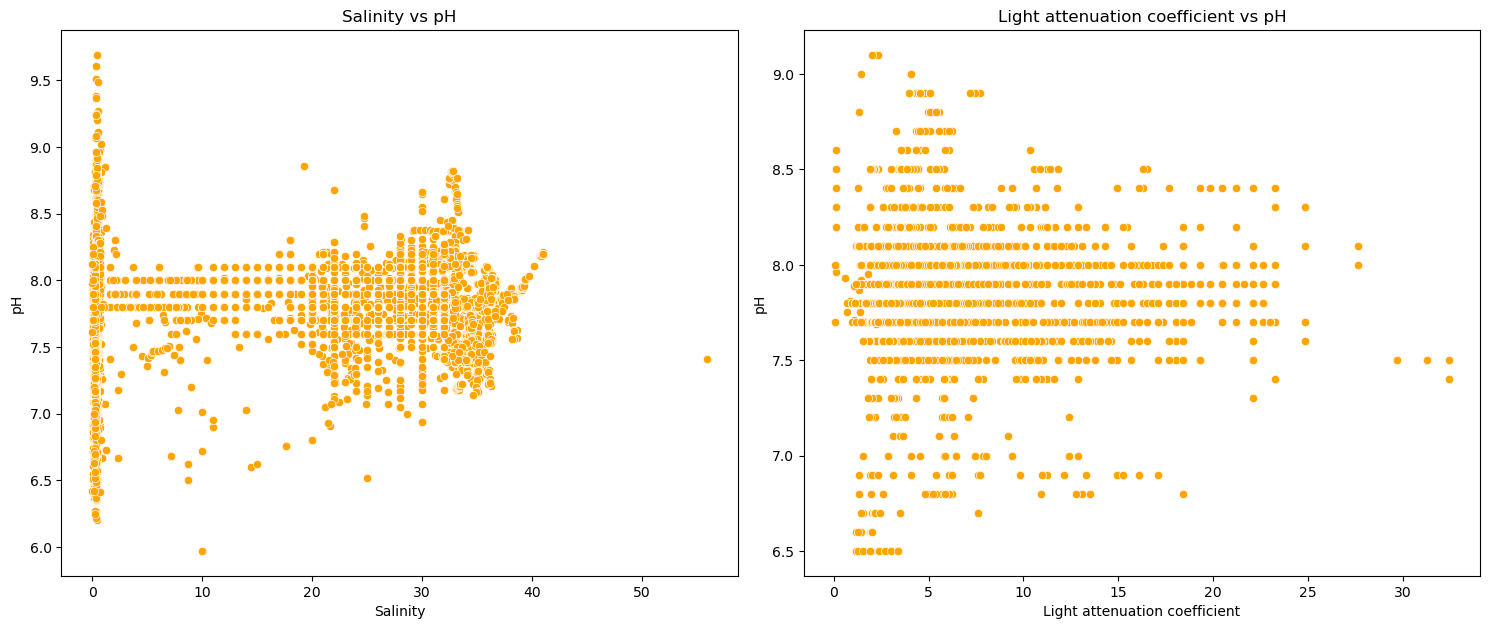

In [25]:
plt.figure(figsize=(15, 12))
interested_features = ['Salinity', 'Light attenuation coefficient']
interested_df = final_data_wq[interested_features]
for i, feature in enumerate(interested_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=interested_df[feature], y=final_data_wq['pH'], color='orange')
    plt.title(f'{feature} vs pH')
    plt.xlabel(feature)
    plt.ylabel('pH')

plt.tight_layout()
plt.show()

The important features list here is important because this is what we are going to use for evential prediction. Here's a plot showing scatterplots between each variable. We see a very obvious relationship between Acidity H+ and pH since pH is mostly the log of H+, which makes sense and helps us see that our dataset's variables make lots of sense given the nature of the relationship between these two variables. The other variables seem to have pretty interesting relationships on the scatter plot.

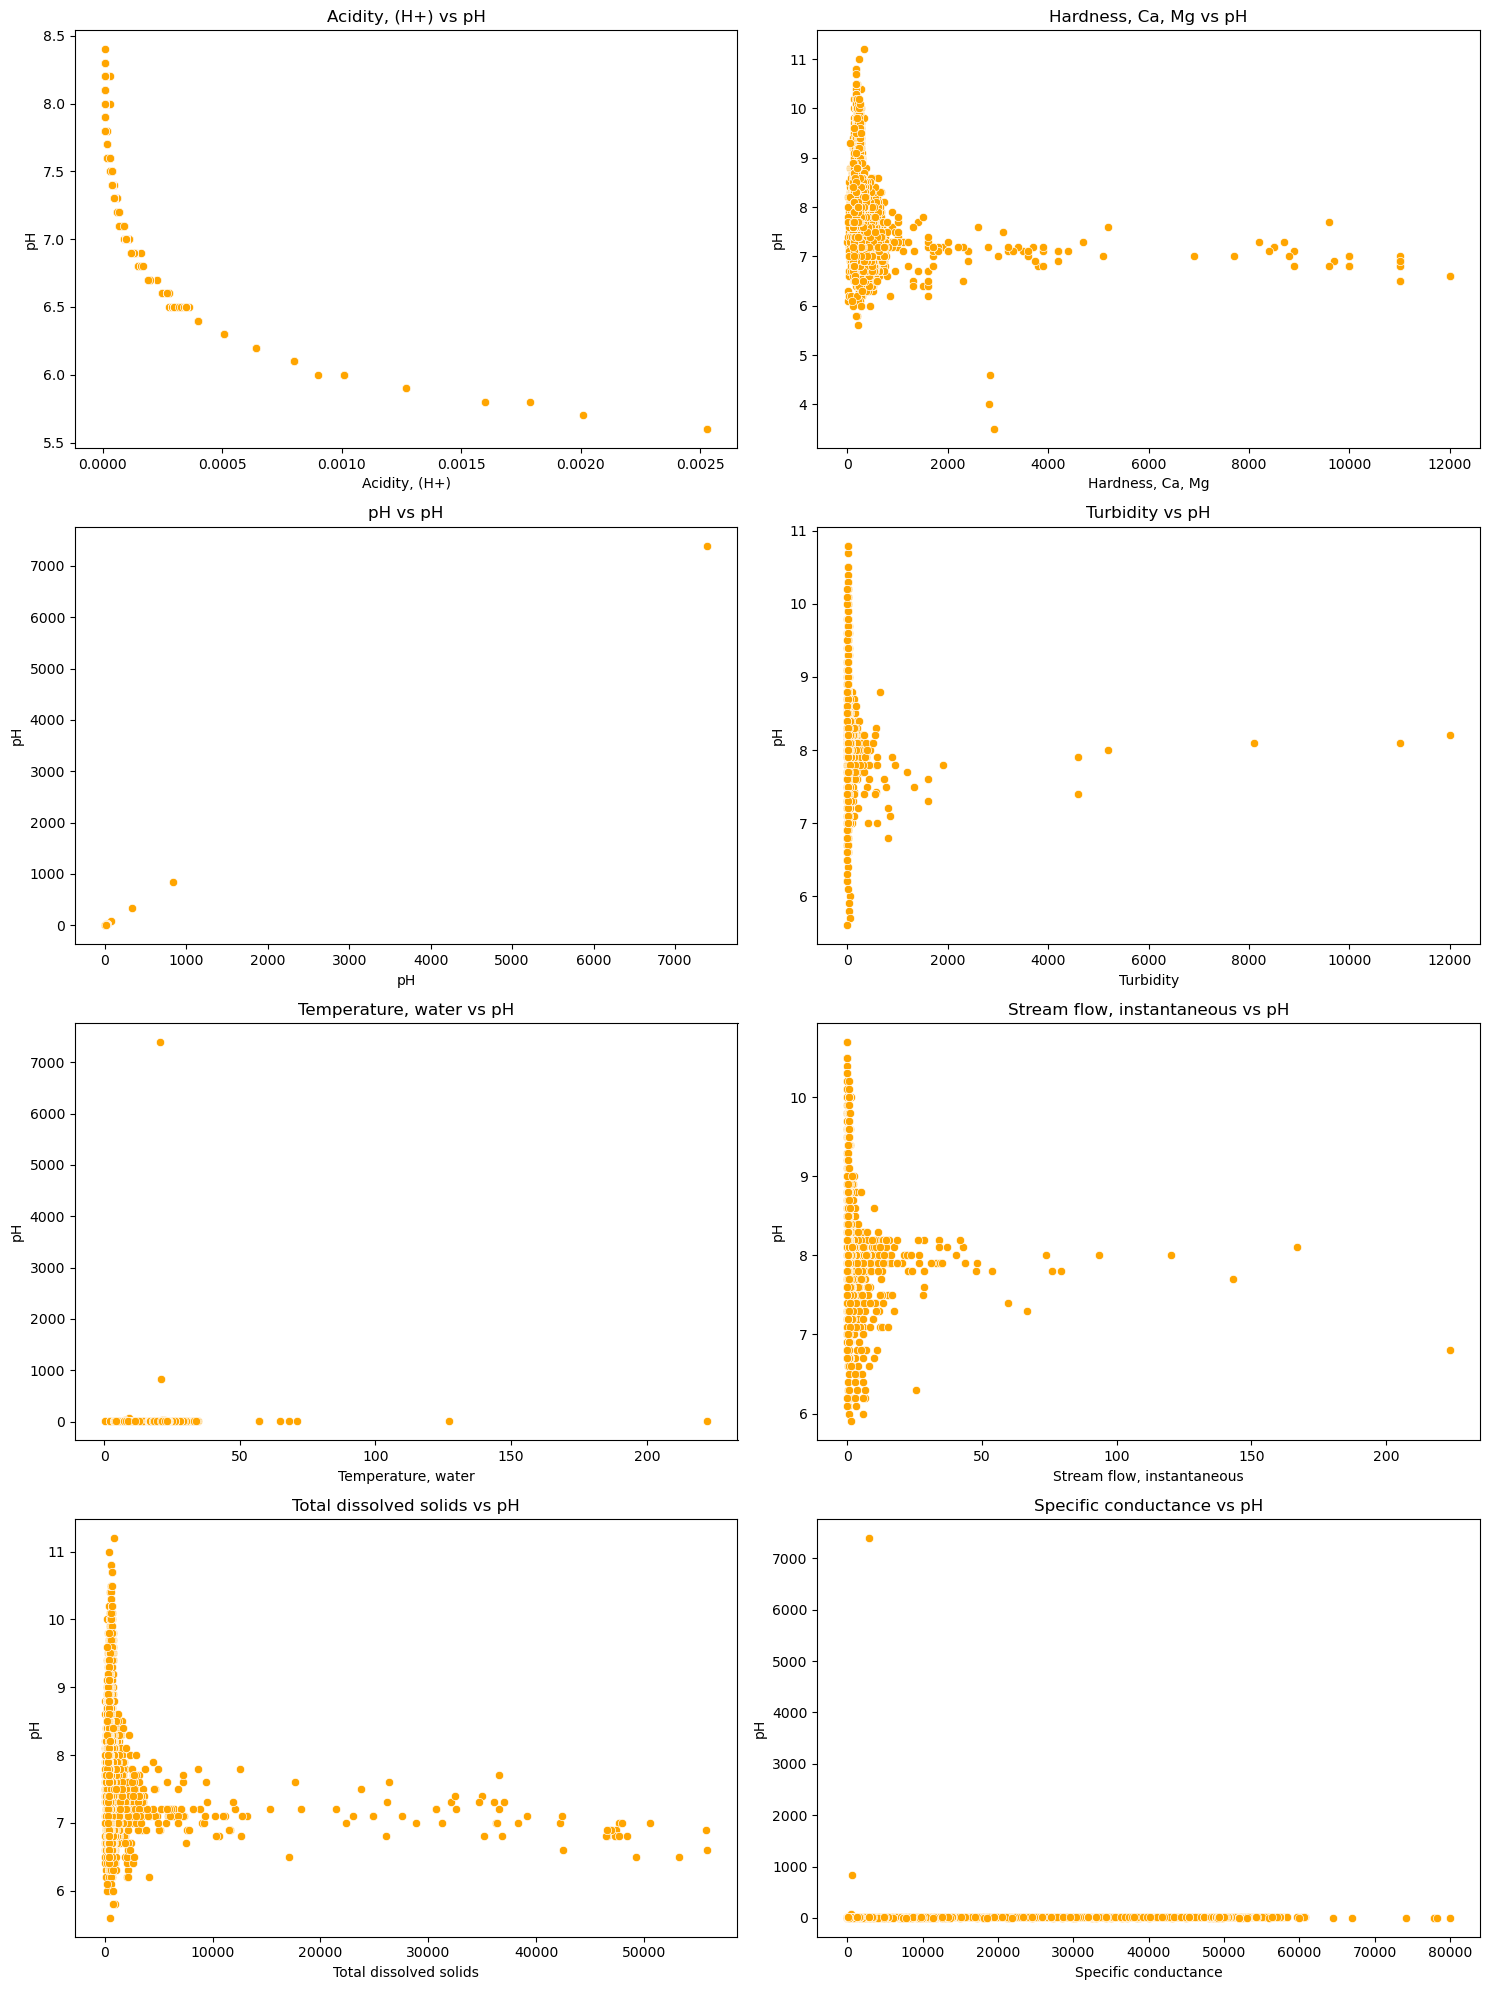

In [26]:
interested_features = ['Acidity, (H+)', 'Hardness, Ca, Mg', 'pH', 'Turbidity', 'Temperature, water', 'Stream flow, instantaneous', 'Total dissolved solids', 'Specific conductance']
n_features = len(interested_features)
n_rows = (n_features + 1) // 2
interested_df = final_data_wq[interested_features]
plt.figure(figsize=(15, n_rows * 5))
for i, feature in enumerate(interested_features, 1):
    plt.subplot(n_rows, 2, i) 
    sns.scatterplot(x=interested_df[feature], y=final_data_wq['pH'], color='orange')
    plt.title(f'{feature} vs pH')
    plt.xlabel(feature)
    plt.ylabel('pH')

plt.tight_layout()
plt.show()

The next few graphs are very relevant. We want to see the correlation between these raw measurements for each variable, filtering on different subsets. Our team dived deeper into organizations and projects, and came up with lists of characteristics measured together. Here were the most frequent and relevant characteristics measured together:

List 1: `'Acidity, (H+)', 'Salinity', 'pH', 'Light attenuation coefficient', 'Temperature, water', 'Specific conductance'`

List 2: `'Orthophosphate', 'Phosphorus', 'Nitrate', 'Ammonia and ammonium', "Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)", 'Silica','Nitrite'`

List 3: `'Acidity, (H+)', 'Hardness, Ca, Mg', 'pH', 'Turbidity', 'Temperature, water', 'Stream flow, instantaneous', 'Total dissolved solids', 'Specific conductance'`

Now, here we have heat maps of each of these variables, within correlation matrices. We can clearly see the correlation between each variable here, and the color legend on the right shows us the color code for each. The lighter, the more positively correlated, the darker, the more negatively correlated.

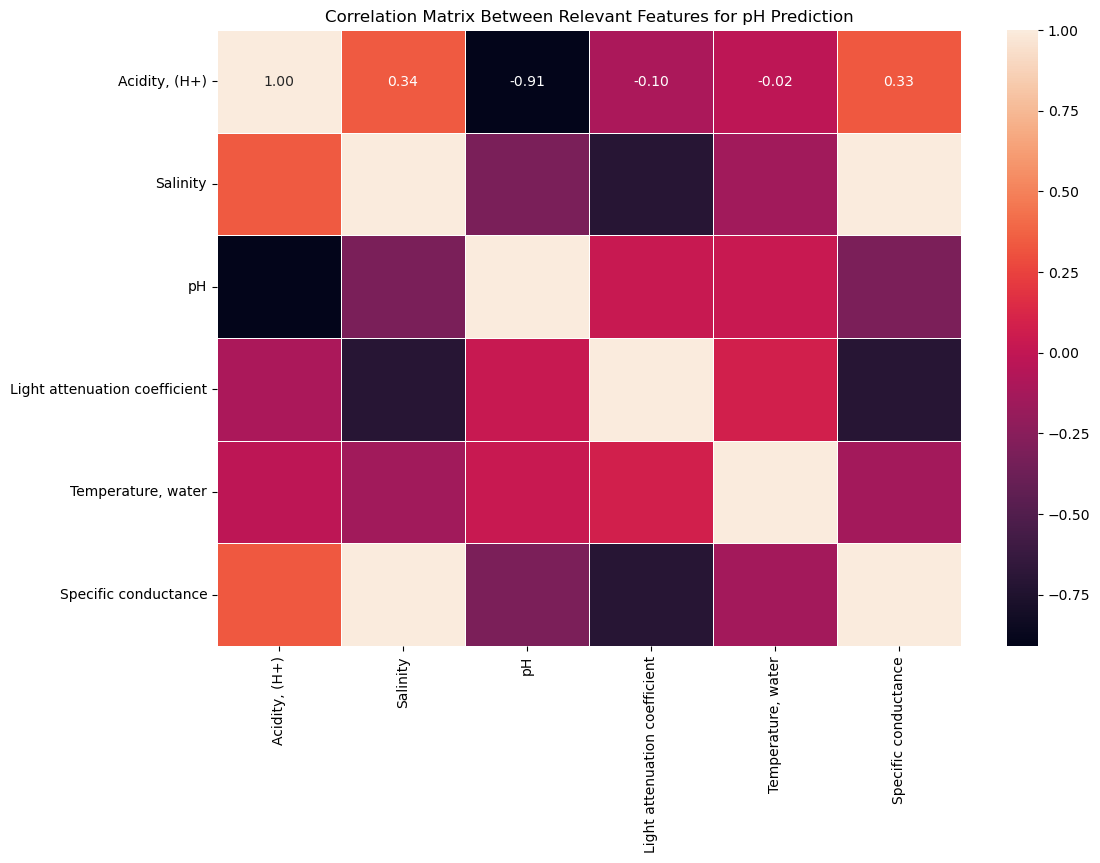

In [27]:
df_specific = final_data_wq[['Acidity, (H+)', 'Salinity', 'pH', 'Light attenuation coefficient', 
                              'Temperature, water', 'Specific conductance']].dropna(axis = 0)

plt.figure(figsize=(12, 8))
corr_matrix = df_specific.corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Relevant Features for pH Prediction')
plt.show()

Now, we do the same thing again here, but for different variables, here it's mostly concerned with this metals.

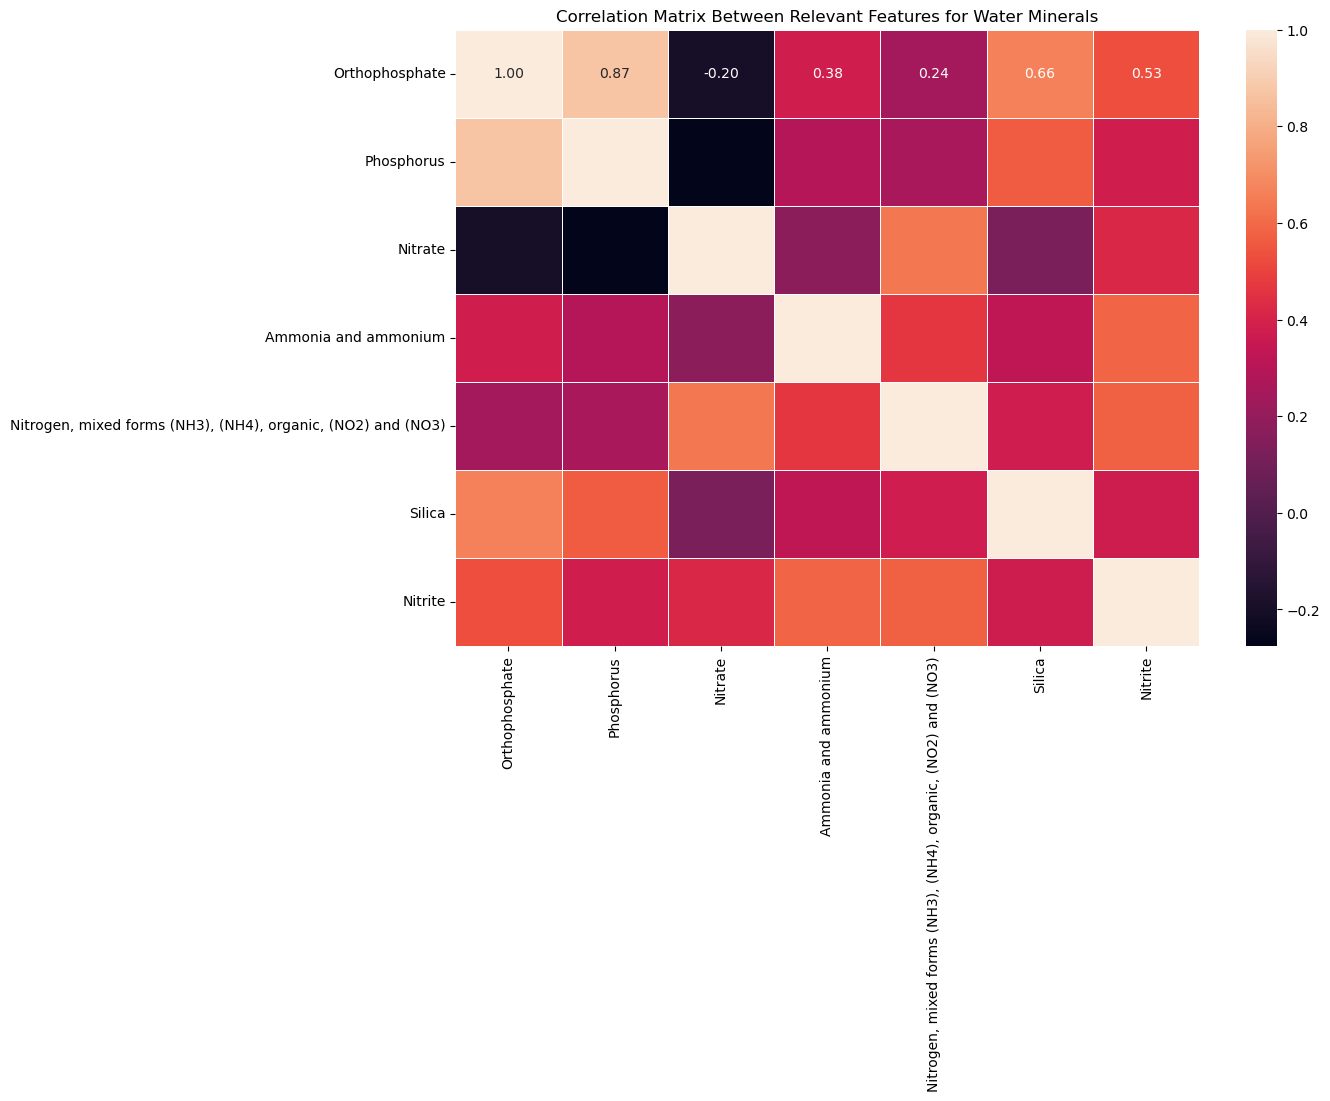

In [28]:
df_specific_big = final_data_wq[['Orthophosphate', 'Phosphorus', 'Nitrate', 'Ammonia and ammonium', "Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)", 
                                 'Silica', 'Nitrite']].dropna(axis = 0)

plt.figure(figsize=(12, 8))
corr_matrix = df_specific_big.corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Relevant Features for Water Minerals')
plt.show()

Once more again, with more relevant water quality characteristics.

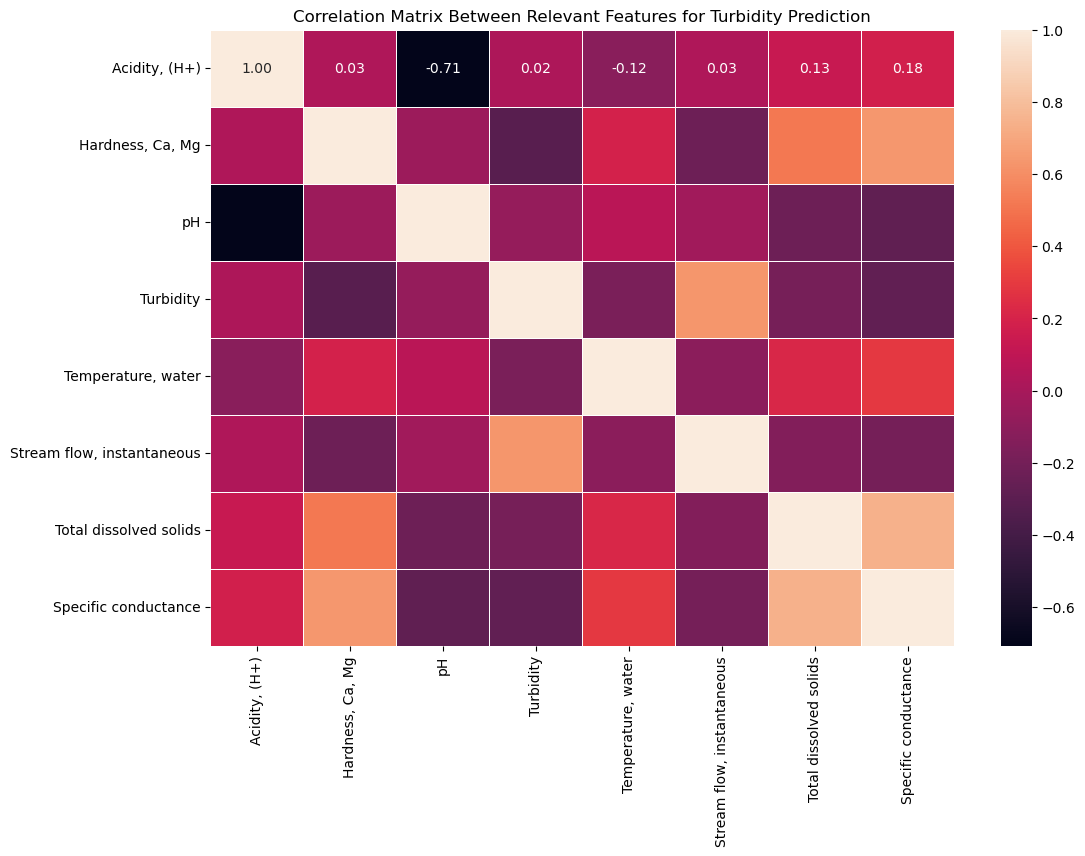

In [29]:
df_specific_big = final_data_wq[['Acidity, (H+)', 'Hardness, Ca, Mg', 'pH', 'Turbidity', 
                                 'Temperature, water', 'Stream flow, instantaneous', 'Total dissolved solids', 'Specific conductance']].dropna(axis = 0)

plt.figure(figsize=(12, 8))
corr_matrix = df_specific_big.corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Relevant Features for Turbidity Prediction')
plt.show()

Each of these lists of variables have very interesting relationships with one another, which we will explore more in Section 7.

Finally, a GeoPandas plot of the longitude/latitude of each site, just to get a good look at every site we are looking at. We need to use the `ca_counties`ShapeFile here, in order to get the plot to be displayed. Also, in order to do this, we have to convert `final_data_wq` into a GeoDataFrame using GeoPandas, converting it into `gdf_activities`.

Those are a lot of water quality measuring sites!

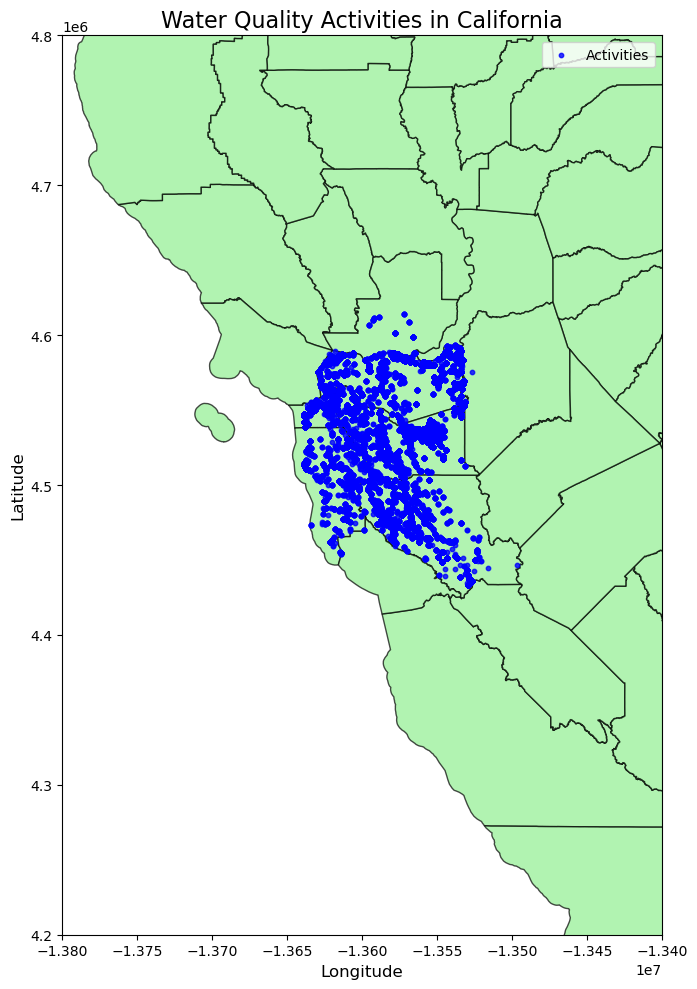

In [30]:
ca_counties = gpd.read_file("ca_counties")

if ca_counties.crs is None:
    ca_counties.set_crs(epsg=4326, inplace=True)  


geometry = gpd.points_from_xy(final_data_wq['LongitudeMeasure'], final_data_wq['LatitudeMeasure'])
gdf_activities = gpd.GeoDataFrame(final_data_wq, geometry=geometry)

gdf_activities.set_crs(epsg=4326, inplace=True)  

common_crs = ca_counties.crs  
gdf_activities = gdf_activities.to_crs(common_crs)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ca_counties.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.7)
gdf_activities.plot(ax=ax, color='blue', markersize=10, alpha=0.8, label='Activities')

plt.title('Water Quality Activities in California', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xlim(-13800000, -13400000)
plt.ylim(4200000, 4800000)

plt.tight_layout()
plt.show()

## EDA with Magnesium <a id="eda-with-mag"></a>

In [31]:
#as we are predicting magnesium levels, we want to drop the null magnesium columns
final_data_metals.dropna(subset = 'Magnesium', inplace = True)


minerals = ['Calcium', 'Magnesium', 'Potassium','Sodium, percent total cations', 'Sodium']


#lambda function to fill numerous NaN values in mineral columns with the respective means of their colimns 
filled = final_data_metals.copy()
filled[minerals] = filled[minerals].apply(lambda column: column.fillna(column.mean()))


Text(0.5, 1.0, 'Correlation Matrix of Minerals')

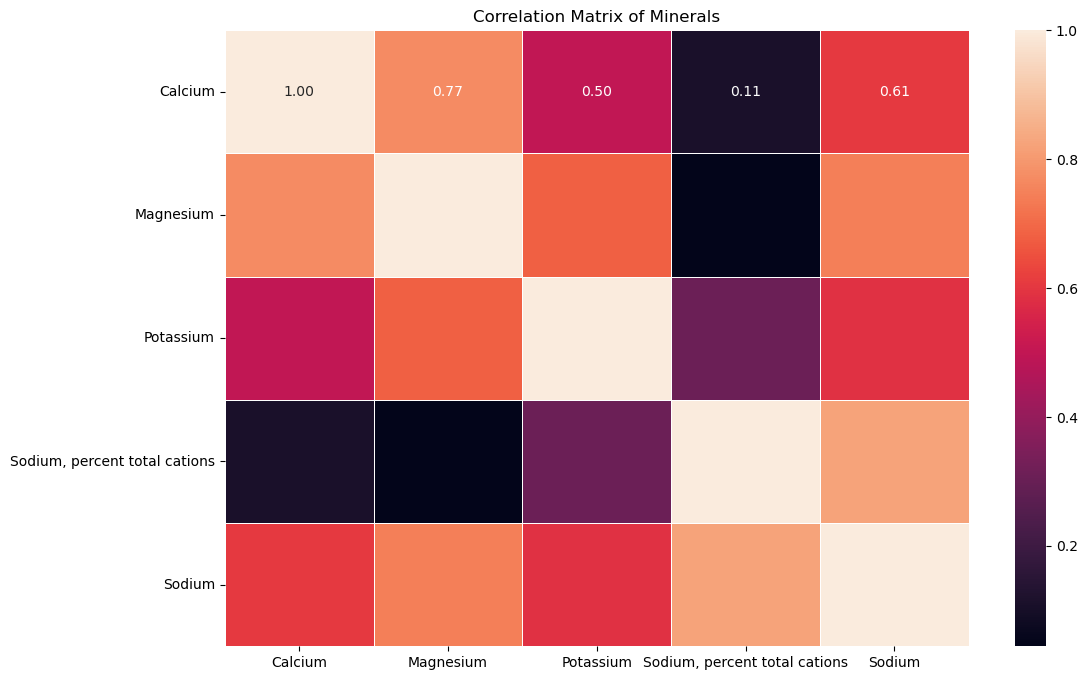

In [32]:
plt.figure(figsize=(12, 8))
corr_matrix = final_data_metals[minerals].corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Minerals')

Through this visualization, we can see that all the minerals are pretty highly correlated with one another. The lowest score for the actual minerals themselves is a 0.31 and the highest is a whopping 0.77

In [33]:
filled.describe()

,Calcium,Magnesium,Potassium,Sodium,"Sodium, percent total cations",ActivityStartDate,LongitudeMeasure,LatitudeMeasure
count,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169,1169.000000,1169.000000
mean,209.153702,118.465451,36.423364,145.271388,23881.355932,2015-01-01 13:30:32.335329280,-121.860074,37.581175
min,3.000000,0.298000,0.360000,3.800000,8000.000000,2010-01-05 00:00:00,-122.507583,36.959900
25%,19.000000,12.000000,2.200000,25.500000,23881.355932,2012-03-05 00:00:00,-122.067722,37.165800
50%,29.000000,17.000000,36.423364,44.000000,23881.355932,2014-10-13 00:00:00,-121.769397,37.654700
75%,67.200000,34.500000,36.423364,86.000000,23881.355932,2017-04-19 00:00:00,-121.605206,37.891000
max,15100.000000,17500.000000,1660.000000,2990.000000,98000.000000,2023-03-22 00:00:00,-121.241917,38.097561
std,1006.790861,915.682713,104.675133,371.868546,5856.360511,NaN,0.296552,0.359395


In [34]:
filled['Sodium, percent total cations'] = np.log(filled['Sodium, percent total cations'])

Sodium, percent total cations stands out in our dataframe description above, having a maximum of nearly 70,000 higher than the mineral with the highest maximum. In addition, it's mean also stands out. If we want to use this as an effective feature, we need to reduce the scale of it so that it's more similar to the other features we are using. Thus, I applied a log function to that column specifically as to minimize the effects of having such an abnormally large feature.

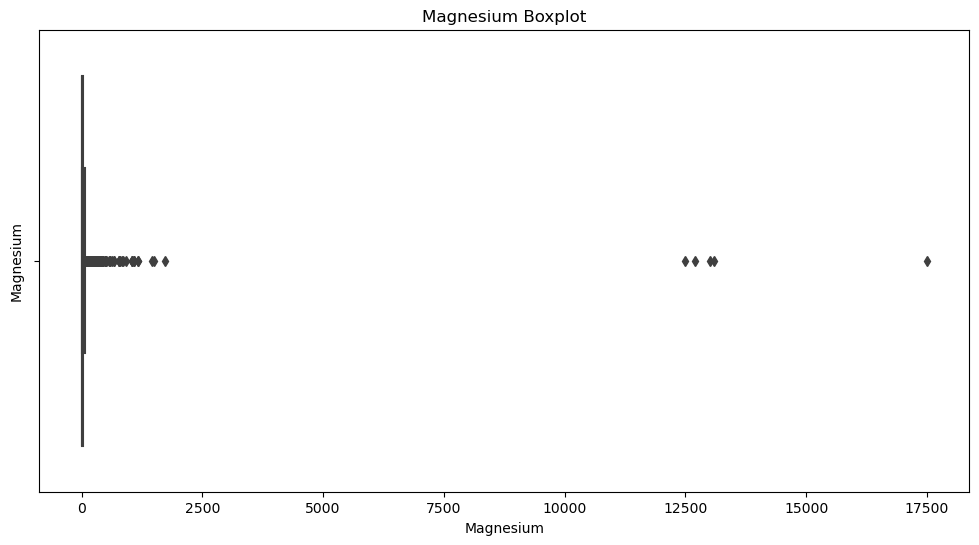

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = filled['Magnesium'])
plt.title("Magnesium Boxplot")
plt.ylabel("Magnesium")
plt.show()

Initial boxplot demonstrating the need to remove really large outliers.

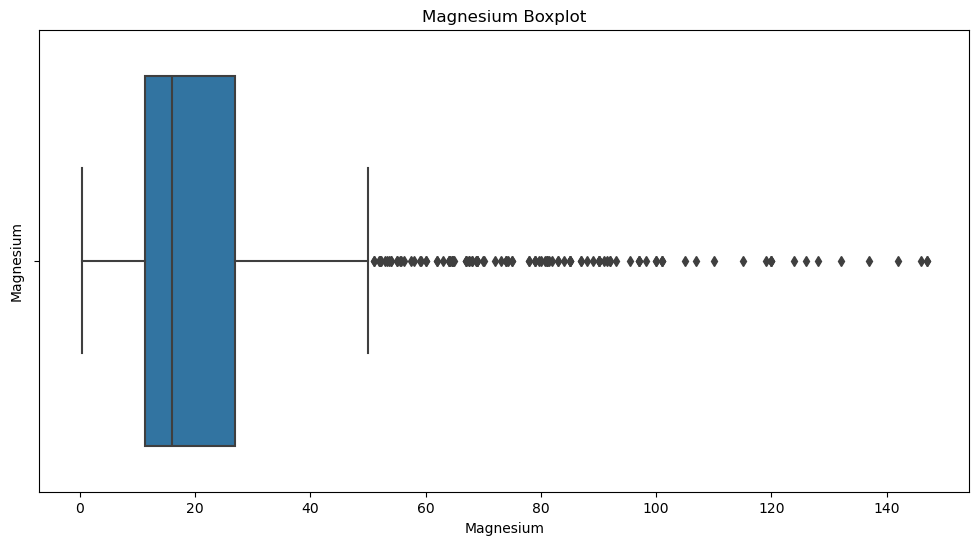

In [36]:
#gets rid of outliers 
Q1 = filled['Magnesium'].quantile(0.15)
Q3 = filled['Magnesium'].quantile(0.85)
IQR = Q3 - Q1

filled = filled[(filled['Magnesium'] >= (Q1 - 1.5 * IQR)) & 
                  (filled['Magnesium'] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(12, 6))
sns.boxplot(x = filled['Magnesium'])
plt.title("Magnesium Boxplot")
plt.ylabel("Magnesium")
plt.show()

Alot better! We can now use this data to predict other Magnesium levels. 

---

# Forecasting and Prediction Modeling (25 points) <a id="forecasting-and-prediction-modeling-25-points"></a>

## Section 1: Function Abstracting <a id="section-1-function-abstracting"></a>

One of the most important modeling decisions a Data Scientist can hear is to abstract. One of the biggest things all of us learned from this class was to work on defining more functions within our Python Notebooks to avoid doing operations over and over, and abstract things. The following two code cells will load in a bunch of different functions we will be using for forecasting and prediction modeling, again & again.. Here is a quick description of them:

- `evaluate_model`: Based on the y_test and y_predicted output, returns metrics telling us how good a model is.
- `plot_predictions`: Plots a model's predictions.
- `collect_predictions`: Collects model predictions for the primary first analysis.
- `cross_validate_model`: Cross validates the specified model.
- `get_Xy`: Returns train, test, and validation dataset. Directly developed from homework.
- `fit_model`: Fits a regularization model to the dataset, based on the `get_Xy` output.
- `check_models`: Checks the effectiveness of a model, graphs the model's regularization parameters. Cross-compares models.

In [37]:
def evaluate_model(y_test, y_pred):
    """
    Author: Damaris Arteaga
    Objective: Returns the MAE, MSE, r2 score based on inputs of y_test and y_pred.
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

def plot_predictions(y_true, predictions, model_name):
    """
    Author: Damaris Arteaga
    Objective: Plots predictions based on inputs.
    """
    plt.figure(figsize=(12, 6))
    
    lower, upper = np.percentile(y_true, 1), np.percentile(y_true, 99)
    y_true = np.clip(y_true, lower, upper)
    predictions = np.clip(predictions, lower, upper)
    
    plt.scatter(y_true, predictions, alpha=0.3)
    
    # Line for perfect prediction (y = predicted)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2)
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
    plt.show()

def collect_predictions(model, X, y, kf):
    """
    Author: Damaris Arteaga
    Objective: Collects predictions with K-fold CV.
    """
    all_predictions = []
    all_actuals = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        all_predictions.extend(y_pred)
        all_actuals.extend(y_val)
    
    return np.array(all_actuals), np.array(all_predictions)

def cross_validate_model(model, X, y, kf):
    """
    Author: Damaris Arteaga
    Objective: Cross-Validates Model using given inputs.
    """

    maes, mses, r2s = [], [], []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_val)
        
        mae, mse, r2 = evaluate_model(y_val, y_pred)
        maes.append(mae)
        mses.append(mse)
        r2s.append(r2)
    
    return np.mean(maes), np.mean(mses), np.mean(r2s)

More functions down here! Run this cell.

In [38]:
def get_Xy(df, cols_to_drop, y_col, val_size, test_size, random_state = CENTRAL_RANDOM_STATE):
    """
    Function author: Vishali Vallioor, wrote for HW 8.

    Objective: This function returns four dataframes containing the testing and training X and y values used in specific case.
    BONUS: Modified to include a validation data set as well.
    Input:
        - df: a Pandas dataframe with all of the fields in the land-use regression dataset; 
        - cols_to_drop: a list of the names (strings) of the columns to drop from df in order to obtain the feature variables.
        - y_col: a column name (as a string) of df that represents the response variable
        - val_size: a float between 0 and 1 indicating the fraction of the train data to use for validation
        - test_size: a float between 0 and 1 indicating the fraction of the data to include in the test split
        - random_state, an integer: used to define the random state
    Returns: X_train, X_test, y_train, y_test, four dataframes containing the training and testing subsets of the 
    feature matrix X and response matrix y
    """
    
    X = df.drop(columns = cols_to_drop)
    y = df[y_col]  
    
    scaler = StandardScaler()
    scaler.fit(X) 
    X_stnd = scaler.transform(X)
    
    X_temp, X_test, y_temp, y_test = train_test_split(X_stnd, y, test_size=test_size, random_state=random_state)
    val_fraction_of_temp = val_size / (1 - test_size)
    
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_fraction_of_temp, random_state=random_state)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

def fit_model(SKL_model, X_train, X_test, y_train, y_test, alpha = 1):
    """
    Function author: Vishali Vallioor, wrote for HW 8.

    Objective: This function fits a model of type SKL_model to the data in the training set of X and y, and finds the MSE on the test set of X and y.
    Inputs: 
        SKL_model: the type of sklearn model with which to fit the data. Options include: LinearRegression, Ridge, or Lasso.
        X_train: the set of features used to train the model.
        y_train: the set of response variable observations used to train the model.
        X_test: the set of features used to test the model.
        y_test: the set of response variable observations used to test the model.
        alpha: the penalty parameter (also known as lambda), to be used with Ridge and Lasso models only.
    Outputs:
        mse: mean squared error
        coef: coefficients of the model  
    """    
    
    if SKL_model == sklearn.linear_model._base.LinearRegression:
        model = SKL_model()
    elif SKL_model == sklearn.linear_model.ElasticNet:
        model = SKL_model(alpha = alpha, l1_ratio = 0.15)
    else:
        model = SKL_model(alpha = alpha)
    
    model.fit(X_train, y_train)
    mse = mean_squared_error(model.predict(X_test), y_test)
    coef = model.coef_.flatten() 
    
    return model, mse, coef

def check_models(df, alpha, X_all_train, X_all_test, y_all_train, y_all_test, target, width=0.1): 
    
    """
    Function author: Nidhi Nayak, wrote for HW 8.

    Objective: This function checks the efficacy of different models. 
    BONUS: Function has been modified to include Elastic Net as well!!

    Inputs: 
        df: DataFrame to check model on.
        alpha: Regularization hyperparameter. Values accepted between 0 and 1 only.
        X_all_train: the training input dataset.
        X_all_test: the training output dataset.
        y_all_train: the testing input dataset.
        y_all_test: the training output dataset.
        target: The Target variable
    Outputs:
        coef_all: all Coefficients for model
    """   
    # Code employed from HW 8, to store MSEs and coefficients for 3 diff models.
    # Modified to include Elastic Net as well!

    Models = [LinearRegression, Ridge, Lasso, ElasticNet]
    modelNames = ["Linear regression", "Ridge", "Lasso", "ElasticNet"]
    models = []
    
    mse_all = np.full(len(Models), np.nan)
    coef_all = np.full((X_all_train.shape[1], len(Models)), np.nan)
    for m, Model in enumerate(Models):
        model_out, mse_all[m], coef_all[:, m] = fit_model(Model, X_all_train, X_all_test, y_all_train, y_all_test, alpha)
        models.append(model_out)
    
    coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))
    
    ind = np.arange(coef_all.shape[0])
    pos = [ind + i * width for i in range(len(Models))]
    
    plt.figure(figsize=(20, 10))
    plt.subplot(211)
    for i in range(len(Models)):
        plt.bar(pos[i], height=coef_all[:, i], width=width, label=modelNames[i])
    
    plt.legend()
    plt.xlabel("Feature number")
    plt.ylabel("Log(feature coefficient)")
    plt.title("Model comparison, all data (without log)")
    plt.axhline()
    
    
    plt.subplot(212)
    for i in range(len(Models)):
        plt.bar(pos[i], height=coef_all_log[:, i], width=width, label=modelNames[i])
    
    plt.legend()
    plt.xlabel("Feature number")
    plt.ylabel("Log(feature coefficient)")
    plt.title("Model comparison, all data (with log)")
    plt.axhline()
    
    plt.show()

    # Finding the lowest MSE option
    for i in range(4):
        print(str(modelNames[i] + " MSE: " + str(mse_all[i])))
    
    print(f"Naive Prediction, predicting mean {target} for all: " + str(np.mean((df[target] - np.mean(df[target]))**2)))

    return models, mse_all

Now that we have all of our functions, we are ready to go through a very abstracted process of modeling.

## Section 2: Dissolved Oxygen Prediction Modeling <a id="section-2-dissolved-oxygen-prediction-modeling"></a>

### Target Variables, Feature Variables <a id="target-variables-feature-variables"></a>

In this section, we will go through our supporting question analysis, to predict the Dissolved Oxygen (DO) values.

- Target Variable: `Dissolved Oxygen (DO) Levels`
- Feature Variables: `'Temperature, water', 'Turbidity', 'pH', 'Nitrate'`

Modeling Approaches:

1) Linear Regression
2) Random Forests
3) XGBoost Modeling

In this step, I addressed missing values in the dataset and removed an unnecessary column to ensure the data is clean and suitable for analysis.

Missing values in key numerical features were replaced using appropriate statistical measures to minimize bias and maintain data integrity:
Temperature, water: The mean was chosen as it preserves the average value of the column, assuming a relatively symmetric distribution. Nitrate:
Missing values were replaced with the median value of Nitrate from a related cleaned dataframe since the median is less affected by outliers, making it ideal for skewed data.

**Turbidity and pH**:
Missing values were replaced with the median value of their respective columns and median imputation ensures robustness in the presence of outliers.

**Dropping Irrelevant Columns**: The column `ActivityStartTime/Time_PST` was removed as it was deemed unnecessary for the analysis.

### Feature Engineering and Model Setup

#### 1. Feature Definition
The features used for prediction are:
- **Temperature, Water**
- **Turbidity**
- **pH**
- **Year**
- **Month**
- **Nitrate**

The target variable is **Dissolved Oxygen (DO)**, which is the focus of the prediction.

#### 2. Adding Lag Features
Lag features were created to account for temporal dependencies:
- `DO_lag1`: Previous day's DO level
- `Temp_lag1`: Previous day's water temperature
- `Turb_lag1`: Previous day's turbidity
- `pH_lag1`: Previous day's pH

These features were generated using the `shift(1)` function, grouped by **LongitudeMeasure** and **LatitudeMeasure**.

```python
filtered_do_df['DO_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])[target].shift(1)
filtered_do_df['Temp_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Temperature, water'].shift(1)
filtered_do_df['Turb_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Turbidity'].shift(1)
filtered_do_df['pH_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['pH'].shift(1)
```
#### 3. Remove Outliers
Outliers in Dissolved Oxygen (DO) were removed using the 1st and 99th percentiles.

#### 4. Model Setup
Features (X): Includes the original features and lag features.
Target (y): Dissolved Oxygen (DO). 

K-fold cross-validation: Models were evaluated using a 5-fold cross-validation loop, which trained on different splits of the data and evaluates on the validation set.

**3 Models**</br>
Linear Regression: Simple linear relationship model.
Random Forest Regressor: A non-linear tree-based model for handling feature interactions.
XGBoost Regressor: A gradient boosting tree model known for high performance in complex predictive tasks.

In this section, we work on defining the features and target for this question. 
We aim to use lagged values (the previous day's temperature, turbidity, pH, and Nitrate levels) in order to predict the next day's Dissolved oxygen (DO) levels. We run the following cells to shift grouping on longitude and latitude.

Here is the code to run and initiate models. Later, I provide explanations and rationale and motivations for each  of my modeling decisions.

In [39]:
# Inspect unique values in 'CharacteristicName' after cleaning
filtered_do_df.head()

,ActivityIdentifier,Dissolved oxygen (DO),Nitrate,"Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure,Year,Month,Day,Weekday,Hour
0,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433632,9.0,NaN,10.0,NaN,7.47,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
1,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433634,9.0,NaN,9.9,NaN,7.49,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
2,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433635,9.0,NaN,9.9,NaN,7.49,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
3,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433636,9.0,NaN,9.9,NaN,7.50,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0
4,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433638,8.0,NaN,9.9,NaN,7.50,GOGA0003,1989-02-21,NaN,-122.495833,37.801158,1989,2,21,1,0


Now, when we run this, we can see there are no nulls which is perfect for our analysis.

In [40]:
filtered_do_df['Nitrate']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
25118   NaN
25119   NaN
25120   NaN
25121   NaN
25122   NaN
Name: Nitrate, Length: 5528, dtype: float64

In this section, we work on defining the features and target for this question. 
We aim to use lagged values (the previous day's temperature, turbidity, pH, and Nitrate levels) in order to predict the next day's Dissolved oxygen (DO) levels. We run the following cells to shift grouping on longitude and latitude.

In [41]:
filtered_do_df.loc[:, 'Temperature, water'] = filtered_do_df['Temperature, water'].fillna(
    filtered_do_df['Temperature, water'].mean()
)

filtered_do_df.loc[:, 'Nitrate'] = filtered_do_df['Nitrate'].fillna(np.median(do_pivoted_df_final.dropna(subset=["Nitrate"])["Nitrate"]))
filtered_do_df.loc[:, 'Turbidity'] = filtered_do_df['Turbidity'].fillna(filtered_do_df['Turbidity'].median())
filtered_do_df.loc[:, 'pH'] = filtered_do_df['pH'].fillna(filtered_do_df['pH'].median())
filtered_do_df = filtered_do_df.drop("ActivityStartTime/Time_PST", axis=1)

Here is the code to run and initiate models. Later, I provide explanations and rationale and motivations for each  of my modeling decisions.

In [42]:
features = ['Temperature, water', 'Turbidity', 'pH', 'Year', 'Month', 'Nitrate']
target = 'Dissolved oxygen (DO)'

# Adding lag features
filtered_do_df.loc[:, 'DO_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])[target].shift(1)
filtered_do_df.loc[:, 'Temp_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Temperature, water'].shift(1)
filtered_do_df.loc[:, 'Turb_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Turbidity'].shift(1)
filtered_do_df.loc[:, 'pH_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['pH'].shift(1)

# Dropping rows with NaN values for lag features
filtered_do_df = filtered_do_df.dropna(subset=['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1'])

# Remove outliers in target variable based on percentiles
lower, upper = np.percentile(filtered_do_df[target], [1, 99])
filtered_do_df = filtered_do_df[(filtered_do_df[target] >= lower) & (filtered_do_df[target] <= upper)]
filtered_do_df.dropna(axis = 0)

# Defining features (X) and target (y)
X = filtered_do_df[features + ['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1']]
y = filtered_do_df[target]

# K-fold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Initialize models
lin_reg = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Function to evaluate models
def evaluate_model(y_test, y_pred):
    """
    Author: Damaris Arteaga
    Objective: Returns the MAE, MSE, r2 score based on inputs of y_test and y_pred.
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Function to plot predictions
def plot_predictions(y_true, predictions, model_name):
    """
    Author: Damaris Arteaga
    Objective: Plots predictions based on inputs.
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(y_true, predictions, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2)
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Function to collect predictions
def collect_predictions(model, X, y, kf):
    """
    Author: Damaris Arteaga
    Objective: Collects predictions with K-fold CV.
    """
    all_predictions = []
    all_actuals = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        all_predictions.extend(y_pred)
        all_actuals.extend(y_val)
    
    return np.array(all_actuals), np.array(all_predictions)

# Function to cross-validate model
def cross_validate_model(model, X, y, kf):
    """
    Author: Damaris Arteaga
    Objective: Cross-Validates Model using given inputs.
    """
    maes, mses, r2s = [], [], []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        mae, mse, r2 = evaluate_model(y_val, y_pred)
        maes.append(mae)
        mses.append(mse)
        r2s.append(r2)
    
    return np.mean(maes), np.mean(mses), np.mean(r2s)

### Modeling Decisions & Rationale: Linear Regression, Random Forests, XGBoost <a id="modeling-decisions--rationale-linear-regression-random-forests-xgboost"></a>


Now, we run our `cross_validate_model` function as defined earlier, which prints out the MAE, MSE, and R2 metrics of each of the three modeling approaches we will be using for this section. The three modeling approaches we are using for this section are:

1) Linear Regression
2) Random Forests
3) XGBoost Modeling

In [43]:
# CV Loop for each model
print("Linear Regression Evaluation:")
mae_lin_reg, mse_lin_reg, r2_lin_reg = cross_validate_model(lin_reg, X, y, kf)
print(f"MAE: {mae_lin_reg}, MSE: {mse_lin_reg}, R2: {r2_lin_reg}\n")

print("Random Forest Evaluation:")
mae_rf, mse_rf, r2_rf = cross_validate_model(rf_regressor, X, y, kf)
print(f"MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}\n")

print("XGBoost Evaluation:")
mae_xgb, mse_xgb, r2_xgb = cross_validate_model(xgb_regressor, X, y, kf)
print(f"MAE: {mae_xgb}, MSE: {mse_xgb}, R2: {r2_xgb}")

Linear Regression Evaluation:
MAE: 1.3957394161750833, MSE: 16.77717198658449, R2: -2.6866568521636767

Random Forest Evaluation:
MAE: 0.7961976037478823, MSE: 1.7456794643236122, R2: 0.6162730718802225

XGBoost Evaluation:
MAE: 0.8368933150327447, MSE: 1.8711237647561005, R2: 0.5890520636231269


# Model Evaluation for Predicting Dissolved Oxygen (DO) Levels

For predicting Dissolved Oxygen (DO) levels, three modeling approaches were used: **Linear Regression** (simple), **Random Forest** (moderately complex), and **XGBoost** (complex).

## 1. Linear Regression (Baseline Model)
- **Motivation:** This model was chosen for its simplicity and interpretability, assuming a linear relationship between predictors and target variables. It serves as a baseline for comparison with more complex models.
- **Model Form:** Linear regression models the target as a linear equation, suitable for capturing simple relationships.
- **Cross-validation:** 5-fold cross-validation was applied to prevent overfitting and evaluate performance across data subsets.
- **Parameter Choices:** Standard choice of 5 folds to balance evaluation with computational efficiency.

## 2. Random Forest (Moderately Complex)
- **Motivation:** Random Forest captures non-linear relationships using an ensemble of decision trees, offering higher accuracy and robustness.
- **Model Form:** An ensemble of decision trees trained on random data subsets, ideal for datasets with interactions and non-linearities.
- **Cross-validation:** 5-fold cross-validation ensured generalizability and reduced overfitting.
- **Parameter Choices:** 100 trees were used for standard evaluation, with no maximum depth to capture deeper relationships.

## 3. XGBoost (Complex)
- **Motivation:** XGBoost excels at capturing complex patterns and interactions and is frequently used in competitive machine learning tasks.
- **Model Form:** A boosting algorithm that builds decision trees sequentially to correct prior errors, effective for linear and non-linear data.
- **Cross-validation:** 5-fold cross-validation ensured generalizability and reduced overfitting.
- **Parameter Choices:** 100 trees, a learning rate of 0.1, and no strict maximum tree depth were chosen for optimal performance.

---

## Cross-validation and Model Selection
- **Training Data:** 5-fold splits trained on 4 subsets and validated on 1.
- **Testing Data:** Held out for unbiased final evaluation.
- **Why 5-fold Cross-validation?:** Balanced choice for computational efficiency and robust evaluation.

---

## Results
### Linear Regression
- **MAE:** 1.40  
- **MSE:** 16.78  
- **R²:** -2.69  

Linear Regression performed poorly, failing to explain variance in DO levels with a negative R². The high error metrics highlight its limitations.

### Random Forest
- **MAE:** 0.80  
- **MSE:** 1.75  
- **R²:** 0.61  

Random Forest performed well, explaining 61% of the variance in DO levels. Its low error metrics underscore its ability to capture non-linear relationships effectively.

### XGBoost
- **MAE:** 0.84  
- **MSE:** 1.87  
- **R²:** 0.59  

XGBoost explained 59% of the variance in DO levels. While slightly less accurate than Random Forest, it remains a robust option.

---

## Conclusion
All three models demonstrated varying degrees of performance. **Random Forest** provided the best balance between accuracy and robustness, making it the preferred model for predicting DO levels. **XGBoost** was a close competitor, offering slightly lower performance but still highly effective for capturing complex relationships.  
**Linear Regression**, while simple, performed poorly with this dataset and was not suitable for accurate DO prediction.

The use of 5-fold cross-validation ensured comprehensive testing and reliable comparisons, making the results trustworthy and reproducible. **Random Forest** is the optimal choice for scenario


### Future Predictive Modeling <a id="future-predictive-modeling"></a>

#### Based on the results, the random forest model performed the best so we will go ahead and use this to predict one day into the future.

In [44]:
# Sort the data by spatial and temporal columns
filtered_do_df = filtered_do_df.sort_values(by=["LongitudeMeasure", "LatitudeMeasure", "ActivityStartDate"])

# Define features and target
features = ['Temperature, water', 'Turbidity', 'pH', 'Year', 'Month', 'Nitrate']
target = 'Dissolved oxygen (DO)'

# Add lag features for prediction
filtered_do_df['DO_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])[target].shift(1)
filtered_do_df['Temp_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Temperature, water'].shift(1)
filtered_do_df['Turb_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Turbidity'].shift(1)
filtered_do_df['pH_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['pH'].shift(1)

# Drop rows with NaN values due to lagging
filtered_do_df = filtered_do_df.dropna(subset=['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1'])

# Features for training and target
X = filtered_do_df[features + ['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1']]
y = filtered_do_df[target]

# Train the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)

# Initialize an empty list to store predictions
predicted_values = []

# Loop through the dataframe to predict one day ahead
for index, row in filtered_do_df.iterrows():
    # Prepare the input for prediction using lagged values
    prediction_input = pd.DataFrame({
        'Temperature, water': [row['Temperature, water']],
        'Turbidity': [row['Turbidity']],
        'pH': [row['pH']],
        'Year': [row['Year']],
        'Month': [row['Month']],
        'Nitrate': [row['Nitrate']],
        'DO_lag1': [row['Dissolved oxygen (DO)']],  # Current DO as lag1
        'Temp_lag1': [row['Temperature, water']],  # Current temp as lag1
        'Turb_lag1': [row['Turbidity']],           # Current turbidity as lag1
        'pH_lag1': [row['pH']]                     # Current pH as lag1
    })
    
    # Predict the next day's DO
    predicted_do = rf_regressor.predict(prediction_input)[0]
    predicted_values.append(predicted_do)

# Add the predictions as a new column to the dataframe
filtered_do_df['Predicted_DO(1 day into the future)'] = predicted_values

# Rename the dataframe to match the desired name
predicted_filtered_do_df = filtered_do_df.copy()

# Display the updated dataframe
predicted_filtered_do_df.head()


,ActivityIdentifier,Dissolved oxygen (DO),Nitrate,"Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,LongitudeMeasure,LatitudeMeasure,Year,Month,Day,Weekday,Hour,DO_lag1,Temp_lag1,Turb_lag1,pH_lag1,Predicted_DO(1 day into the future)
147,11NPSWRD_WQX-GOGA_CCSF_OM09_19890221_1433847,9.0,1.0,10.2,4.94,7.56,GOGA0003,1989-02-21,-122.521677,37.772495,1989,2,21,1,0,9.0,10.3,4.94,7.56,8.886867
148,11NPSWRD_WQX-GOGA_CCSF_OM09_19890221_1433848,9.0,1.0,10.1,4.94,7.58,GOGA0003,1989-02-21,-122.521677,37.772495,1989,2,21,1,0,9.0,10.2,4.94,7.56,8.983667
149,11NPSWRD_WQX-GOGA_CCSF_OM09_19890221_1433850,9.0,1.0,10.1,4.94,7.58,GOGA0003,1989-02-21,-122.521677,37.772495,1989,2,21,1,0,9.0,10.1,4.94,7.58,8.983667
150,11NPSWRD_WQX-GOGA_CCSF_OM09_19890221_1433852,9.0,1.0,10.1,4.94,7.59,GOGA0003,1989-02-21,-122.521677,37.772495,1989,2,21,1,0,9.0,10.1,4.94,7.58,9.000000
151,11NPSWRD_WQX-GOGA_CCSF_OM09_19890221_1433853,9.0,1.0,10.1,4.94,7.59,GOGA0003,1989-02-21,-122.521677,37.772495,1989,2,21,1,0,9.0,10.1,4.94,7.59,9.000000


##### We started by sorting the data based on spatial (Longitude and Latitude) and temporal (ActivityStartDate) columns to ensure chronological order. We selected features such as water temperature, turbidity, pH, year, month, and nitrate levels, while dissolved oxygen (DO) served as the target variable. To capture temporal dependencies we added lag features for DO, temperature, turbidity, and pH, and trained a Random Forest model to predict one day ahead using these features. The model's predictions were made for each row of the dataframe and stored in a new column, generating the final `predicted_filtered_do_df` with predicted values of DO for the next day. This process was about iterating through the dataframe to prepare the input for each prediction, using the current day's values as lag features for the next day's prediction.

---

## Section 3: pH Prediction Modeling <a id="section-3-ph-prediction-modeling"></a>

### Target Variables, Feature Variables <a id="target-variables-feature-variables-1"></a>

Our main goal for the core prediction question is to develop a model to predict pH levels. We employ these functions in order to do so. Finally, we use `get_Xy` to give us validation dataset in order to generate the final predictions, for our forecasting prediction model. 

Broadly speaking, our target and features are:
- Target Variable: `'Acidity, (H+)', 'Salinity', 'pH', 'Light attenuation coefficient', 'Temperature, water', 'Specific conductance'`
- Feature Variables: `pH`

4 Modeling Approaches:
1) Linear Regression
2) Ridge Regularization Regression
3) Lasso Regularization Regression
4) ElasticNet Regularization Regression

Run the following cell to get `df_specific`, which is a specific DataFrame containing only the values we want for our prediction. 

In [45]:
cols_to_use = ['Acidity, (H+)', 'Salinity', 'pH', 'Light attenuation coefficient', 'Temperature, water', 'Specific conductance',
               'LongitudeMeasure', 'LatitudeMeasure', 'ActivityStartDate']

df_specific = final_data_wq[cols_to_use]
df_specific = df_specific.dropna(axis = 0)

This next cell creates a *shifted* DataFrame for predicting one day into the future. We create this DataFrame in order to generate predictions for future days, which is a primary goal for our analysis. *Specifically, we want to predict 1 day into the future subject to our dataset's time constraints, so 1 day further from the latest date our DataFrame gives us data on. Unfortunately, our dataset doesn't go all the way until December 2024, so we can't do future predictions.*

In [46]:
df_specific_big = df_specific.sort_values(by=['LongitudeMeasure', 'LatitudeMeasure', 'ActivityStartDate'])

df_specific_big['Prev_Acidity, (H+)'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Acidity, (H+)'
].shift(1)

df_specific_big['Prev_Salinity'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Salinity'
].shift(1)

df_specific_big['Prev_Light attenuation coefficient'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Light attenuation coefficient'
].shift(1)

df_specific_big['Prev_Temperature, water'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Temperature, water'
].shift(1)

df_specific_big['Prev_Specific conductance'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Specific conductance'
].shift(1)

df_specific_shifted = df_specific_big.dropna(subset=["Prev_Acidity, (H+)"], axis = 0)
df_specific_shifted.head()

,"Acidity, (H+)",Salinity,pH,Light attenuation coefficient,"Temperature, water",Specific conductance,LongitudeMeasure,LatitudeMeasure,ActivityStartDate,"Prev_Acidity, (H+)",Prev_Salinity,Prev_Light attenuation coefficient,"Prev_Temperature, water",Prev_Specific conductance
60415,0.00001,14.0,8.0,10.15,10.8,22200.0,-122.437751,37.969923,1978-01-31,0.00001,11.0,10.31,10.4,18500.0
60416,0.00001,14.0,8.0,9.96,10.8,23300.0,-122.437751,37.969923,1978-01-31,0.00001,14.0,10.15,10.8,22200.0
60417,0.00001,16.0,8.0,8.72,10.9,25500.0,-122.437751,37.969923,1978-01-31,0.00001,14.0,9.96,10.8,23300.0
60418,0.00001,19.0,8.0,5.24,11.6,30900.0,-122.437751,37.969923,1978-01-31,0.00001,16.0,8.72,10.9,25500.0
60419,0.00001,22.0,8.0,5.71,11.8,34600.0,-122.437751,37.969923,1978-01-31,0.00001,19.0,5.24,11.6,30900.0


### Modeling Decisions & Rationale: OLS, Ridge, Lasso, ElasticNet <a id="modeling-decisions--rationale-ols-ridge-lasso-elasticnet"></a>

Now, we run the model on the columns we want to use, in this case, `['Acidity, (H+)', 'Salinity', 'pH', 'Light attenuation coefficient', 'Temperature, water', 'Specific conductance']`, and specify the variable we want to predict `pH`. This outputs the model comparison in addition to the MSEs obtained by the model, plus a naive MSE. We output this naive MSE because in addition to the MSEs, the naive MSE is the error obtained if we just predicted the mean pH for every value (so essentially speaking, it puts it into context easier so we can see if the models actually outperform the naive MSE). 

We use the function as per defined earlier so that we can abstract everything. Also, the function runs both with log and without log to see the difference in regularization coefficients.

Here, we are using 4 different modeling approaches:
- **Linear Regression**
- **Ridge Regularization Modeling**
- **Lasso Regularization Modeling**
- **ElasticNet Regularization Modeling**

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_27557/843895944.py:94: RuntimeWarning: divide by zero encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))
/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_27557/843895944.py:94: RuntimeWarning: invalid value encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))


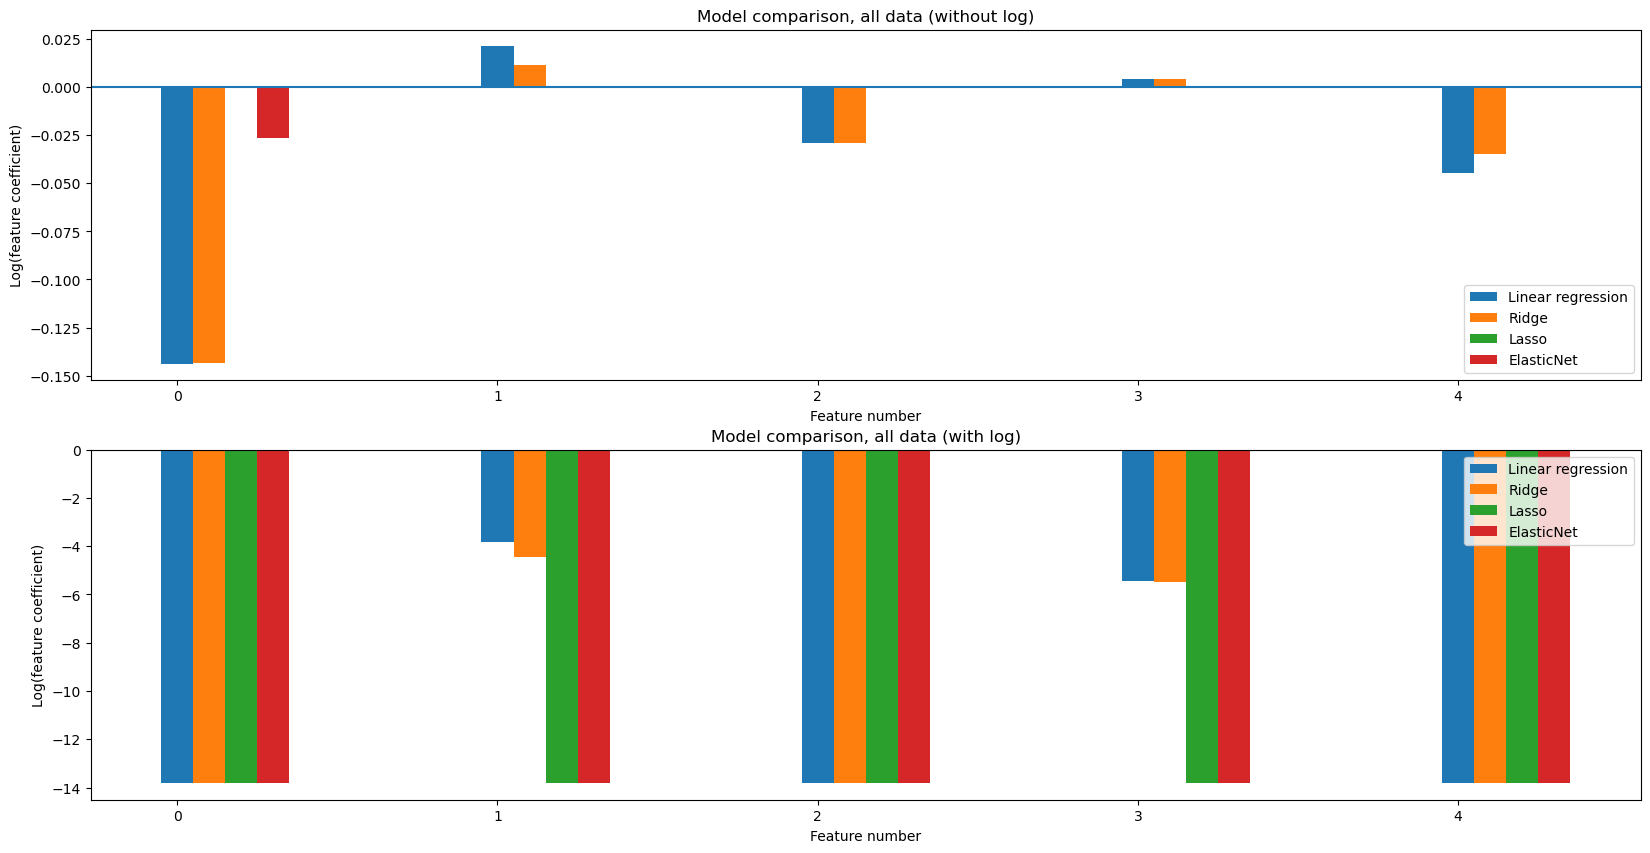

Linear regression MSE: 0.00407331722118767
Ridge MSE: 0.004068937104284081
Lasso MSE: 0.02645262063805896
ElasticNet MSE: 0.019065317695427554
Naive Prediction, predicting mean pH for all: 0.02628641119940553


In [47]:
df_specific_2 = final_data_wq[['Acidity, (H+)', 'Salinity', 'pH', 'Light attenuation coefficient', 'Temperature, water', 'Specific conductance']].dropna(axis = 0)

X_train_pH, X_val_pH, X_test_pH, y_train_pH, y_val_pH, y_test_pH = get_Xy(df_specific_2, ['pH'], 'pH', 0.2, 0.2, random_state=CENTRAL_RANDOM_STATE)

models_pH, mse_all = check_models(df_specific, 0.7, X_train_pH, X_test_pH, y_train_pH, y_test_pH, "pH")

Clearly, we can see that the models all outperform the naive MSE (except for Lasso which does really bad). However, Ridge performs exceptionally, nearly 1/5th of the MSE of naive prediction. 

Now, we create a second model. This model slightly underperforms the other model, but it is used solely for future predictions, which we will get to within the next few sections.

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_27557/843895944.py:94: RuntimeWarning: divide by zero encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))
/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_27557/843895944.py:94: RuntimeWarning: invalid value encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))


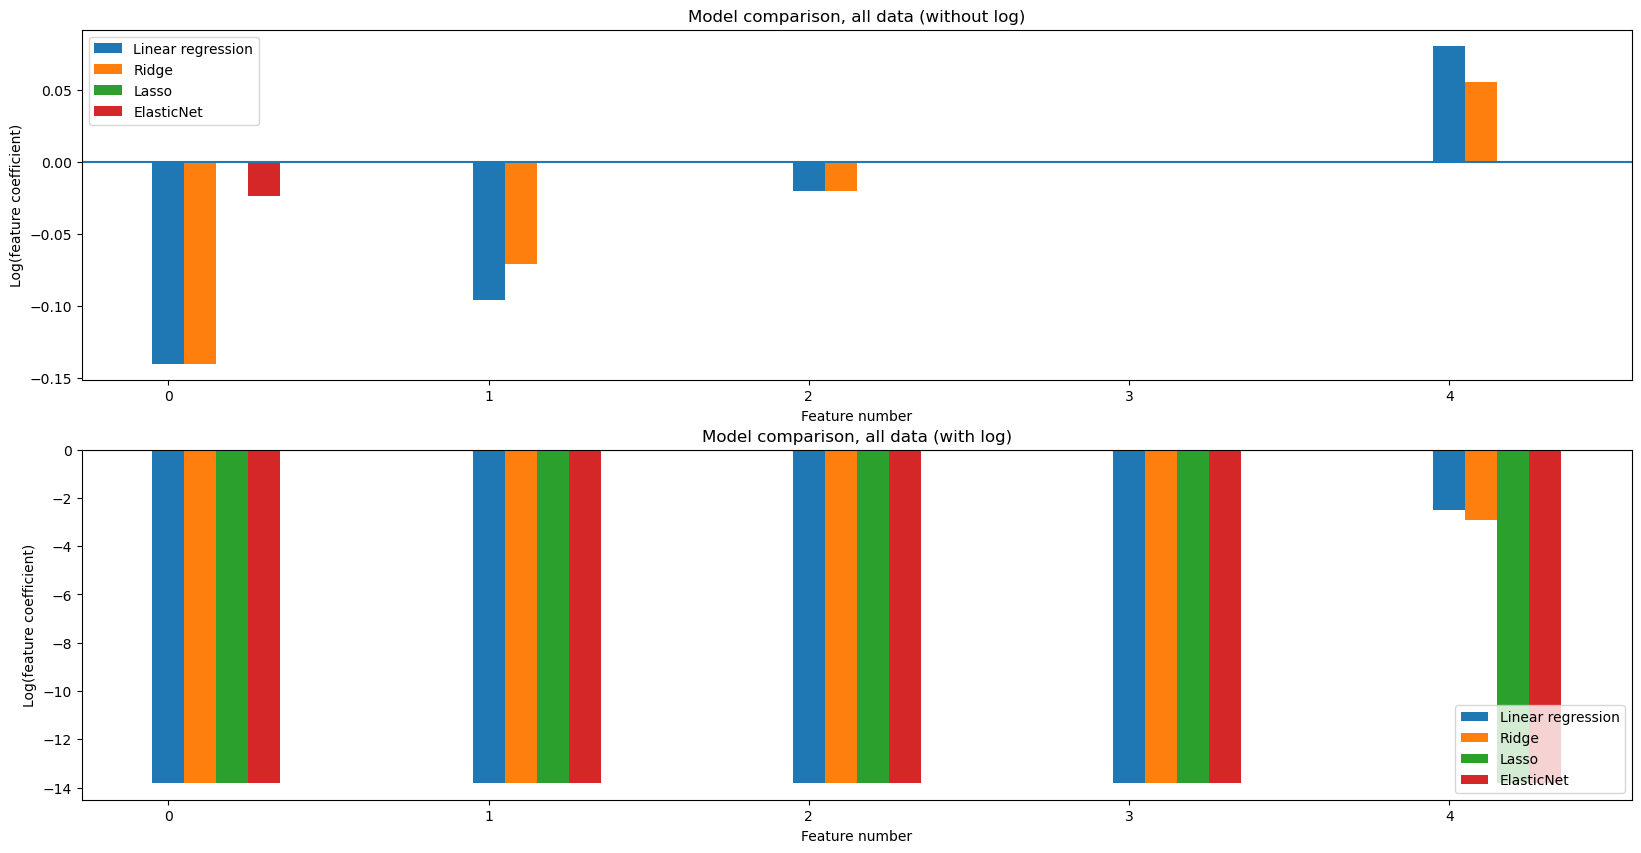

Linear regression MSE: 0.00598085843951314
Ridge MSE: 0.00598728611816561
Lasso MSE: 0.02754691242263269
ElasticNet MSE: 0.021020976681330385
Naive Prediction, predicting mean pH for all: 0.026339899590165746


In [48]:
df_specific_3 = df_specific_shifted[['Prev_Acidity, (H+)',
       'Prev_Salinity', 'Prev_Light attenuation coefficient',
       'Prev_Temperature, water', 'Prev_Specific conductance', 'pH']].dropna(axis = 0)

X_train_pH, X_val_pH, X_test_pH, y_train_pH, y_val_pH, y_test_pH = get_Xy(df_specific_3, ['pH'], 'pH', 0.2, 0.2, random_state=CENTRAL_RANDOM_STATE)

models_pH_lag, mse_all = check_models(df_specific_3, 0.7, X_train_pH, X_test_pH, y_train_pH, y_test_pH, "pH")

### Future Predictive Modeling <a id="future-predictive-modeling-1"></a>

Since the Ridge Model performed the best, we will use it to develop a prediction 1 day into the future of the date extent of our dataset. First, in order to do this, we define a function named `prediction_pH` which takes the best Ridge model and generates the predictions

In [49]:
def prediction_pH(input_data):
    """
    Author: Vishali Vallioor
    Objective: Takes in input_data for a given day, and returns the pH prediction for a future day.
    """
    best_model_ridge_pH = models_pH_lag[1]
    scaler = StandardScaler()
    scaler.fit(input_data) 
    X_stnd = scaler.transform(input_data)
    y_val_pred = best_model_ridge_pH.predict(X_stnd)
    return y_val_pred

Now, we generate a prediction a day into the future of the dataset. We find the last timestamp the dataset is recorded at, and generate a future pH level. Run the following cell in order to generate the future forecast.

In [50]:
df_sorted = df_specific_shifted.sort_values("ActivityStartDate", ascending=True)

last_date_values = df_sorted.iloc[-1][["Prev_Acidity, (H+)", 
                                      "Prev_Salinity", 
                                      "Prev_Light attenuation coefficient", 
                                      "Prev_Temperature, water", 
                                      "Prev_Specific conductance"]].values.reshape(1, -1)
prediction_pH(last_date_values)[0]

7.8527877532820245

### Direct Application to Resource Allocation Question <a id="direct-application-to-resource-allocation-question"></a>

One of the most important aspects of this project was directly applying everything back to the scope of our Resource Allocation Question, which is, once again, **Based on the predicted water quality features (pH, Magnesium, and DO levels), this project will help determine where to prioritize investments in infrastructure, such as water treatment plants, drainage systems, and nitrate removal technologies, across the Bay Area, as well as restoration efforts, with the end goal being to improve water quality management.*. 

Now, to frame our prediction forecasting model directly into this, here's a code cell I wrote up that predicts pH levels in the Bay Area, and checks for problematic pH zones (where the pH is above 8, which isn't alarming but a bit scary). Now the output here uses GeoPandas by merging back on the initial GeoDataFrame we used from before. 

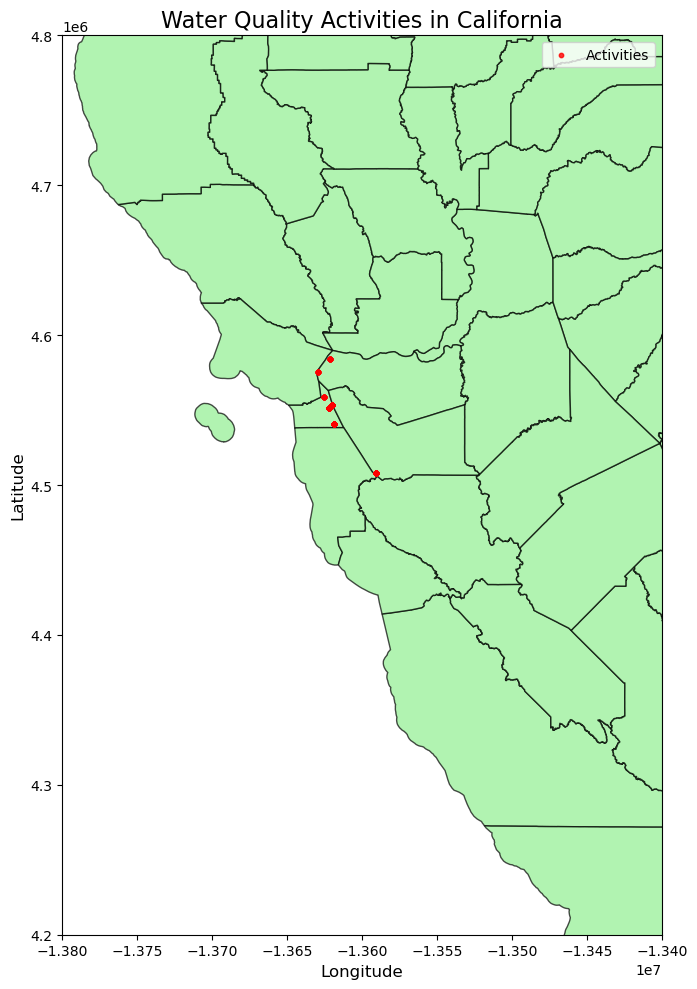

In [51]:
filtered_wq_df = df_specific_shifted[["Prev_Acidity, (H+)", "Prev_Salinity", "Prev_Light attenuation coefficient", 
                               "Prev_Temperature, water", "Prev_Specific conductance"]].dropna(axis = 0)
x_vals = filtered_wq_df.values
y_val_pred = prediction_pH(x_vals)
filtered_wq_df["pH_predicted"] = y_val_pred

problematic_ph_areas = filtered_wq_df[filtered_wq_df["pH_predicted"] > 8]

gdf_problematic = gdf_activities.merge(problematic_ph_areas, left_index=True, right_index=True)

gdf_problematic = gdf_problematic.to_crs(common_crs)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ca_counties.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.7)
gdf_problematic.plot(ax=ax, color='red', markersize=10, alpha=0.8, label='Activities')

plt.title('Water Quality Activities in California', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xlim(-13800000, -13400000)
plt.ylim(4200000, 4800000)

plt.tight_layout()
plt.show()

---

## Section 4: Magnesium Prediction Modeling <a id="section-4-magnesium-prediction-modeling"></a>


In this prediction question, we aim to predict target variable `Magnesium` levels using the feature variables 'Sodium', 'Sodium percent total cations', 'Potassium', and 'Calcium'.

We use the following modeling approaches:

1) K-Nearest Neighbors

2) Decision Tree

3) Random Forest

### Modeling Decisions & Rationale: kNN, Decision Tree, Random Forest <a id="modeling-decisions--rationale-"></a>

In [52]:
features = ['Calcium', 'Potassium', 'Sodium', 'Sodium, percent total cations']
X = filled[features]
y = filled['Magnesium']

#normalize features for kNN 
scaler = StandardScaler()
std_x = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(std_x, y, test_size = 0.2, random_state = 10)


knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(74.18570298242992, 0.8423416311440004)

We decided to use kNN for predicting magnesium levels based on data that we have on other minerals, as these minerals were highly correlated as can be seen in our correlation matrix. Also, we normalized all our features, so kNN should be decent at capturing the relationships between the different minerals. We used the default value for k, which is 5 in order to balance between overfitting and underfitting magnesium values. Indeed, kNN did a pretty good job at capturing these relationships given our R2 and MSE values. However, this model could be prone to overfitting.

In [53]:
dt = DecisionTreeRegressor(random_state = 10)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt


(56.1828314184839, 0.8806010699764126)

Next is our basic untuned Decision Tree Regression model. This performed slightly better than our kNN model in terms of both R2 and MSE, but it could still use some improvements as our mean magnesium value is only about 118.5 

In [54]:
param_dist = {'max_leaf_nodes': randint(3, 100),
              'min_samples_leaf': randint(1, 10),
              'min_samples_split': randint(2, 20)}

dt_search = RandomizedSearchCV(dt, param_distributions=param_dist, cv=5, n_iter = 100, random_state = 10)

dt_search.fit(X_train, y_train)
print(dt_search.best_params_)

{'max_leaf_nodes': 84, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [55]:
dt_op = DecisionTreeRegressor(random_state = 10, max_leaf_nodes = 90, min_samples_leaf = 8, min_samples_split = 9)
dt_op.fit(X_train, y_train)

dtpred_op = dt_op.predict(X_test)

omse_dt = mean_squared_error(y_test, dtpred_op)
or2_dt = r2_score(y_test, dtpred_op)

omse_dt, or2_dt

(113.78763210047867, 0.7581801917116449)

We then tuned our Decision Tree hyperparameters using RandomizedSearchCV. However, this seemed to worsen our model greatly in both MSE and R2 score from the Decision Tree model without tuned hyperparameters. We suspect that this is due to overfitting.

In [56]:
rf = RandomForestRegressor(n_estimators = 150, random_state = 10)
rf.fit(X_train, y_train)

rfpred = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, rfpred)
r2_rf = r2_score(y_test, rfpred)

mse_rf, r2_rf


(54.696964438665646, 0.8837588127079282)

Next is our Random Forest Regression model without tuned hyperparameters. We set the number of decision trees to 150 in order to get a higher performing model that doesn't take too long to load. This performed pretty similarly to our basic untuned Decision Tree model and is our best performing model yet.

In [57]:
rf_search = RandomizedSearchCV(rf, param_distributions = param_dist,cv=5, n_iter = 20, random_state = 10)

rf_search.fit(X_train, y_train)
print(rf_search.best_params_)

{'max_leaf_nodes': 31, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [58]:
rf_op = RandomForestRegressor(random_state = 10, max_leaf_nodes = 65, min_samples_leaf = 2, min_samples_split = 10)
rf_op.fit(X_train, y_train)

rfpred_op = rf_op.predict(X_test)

omse_rf = mean_squared_error(y_test, rfpred_op)
or2_rf = r2_score(y_test, rfpred_op)

omse_rf, or2_rf

(63.42926337597357, 0.865201058970055)

Lastly, we have our Random Forest regression model tuned using parameters from RandomizedSearchCV. Surprisingly, this model also did worse than our untuned Random Forest regression model, also possibly because of overfitting.

---

# Visualization of Model Efficacy <a id="visualization"></a>

## Dissolved Oxygen Models <a id="dissolved-oxygen-models"></a>

The following section displays visualizations from the outputs of our models. Our models generate good water quality characteristic predictions for each of our prediction questions.

**Visualization 1**: Prediction Question 1, predicting `Dissolved Oxygen` based on inputs, `'Temperature, water', 'Turbidity', 'pH', 'Nitrate'`.

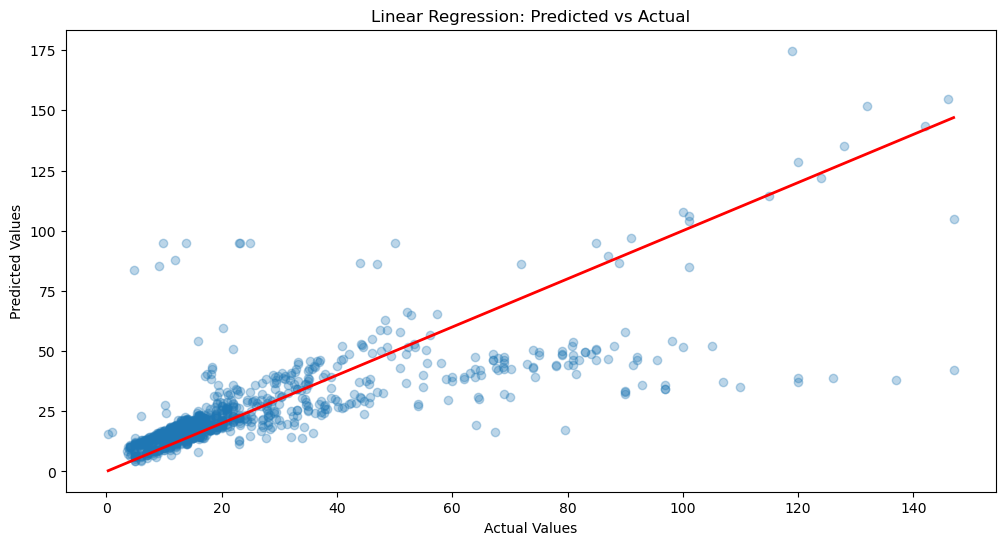

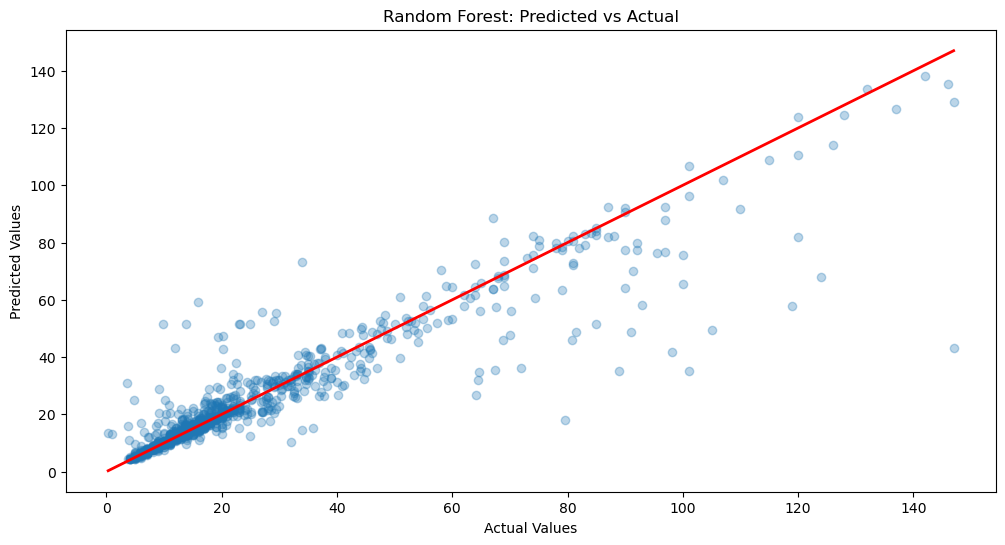

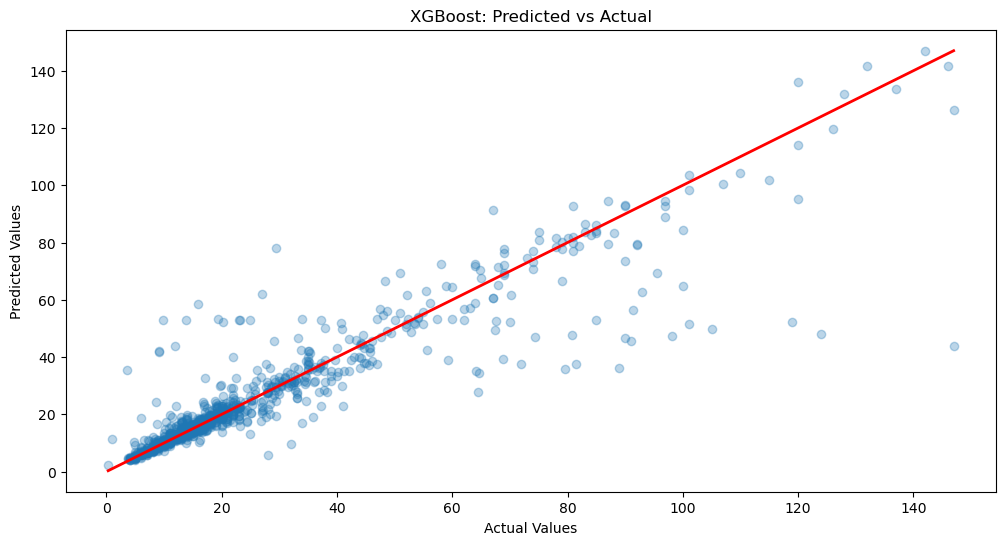

In [59]:
y_actual_lin_reg, y_pred_lin_reg = collect_predictions(lin_reg, X, y, kf)
y_actual_rf, y_pred_rf = collect_predictions(rf_regressor, X, y, kf)
y_actual_xgb, y_pred_xgb = collect_predictions(xgb_regressor, X, y, kf)

# Visualizing the predictions for each model
plot_predictions(y_actual_lin_reg, y_pred_lin_reg, 'Linear Regression')
plot_predictions(y_actual_rf, y_pred_rf, 'Random Forest')
plot_predictions(y_actual_xgb, y_pred_xgb, 'XGBoost')

Visualization 2: Next day prediction model for Dissolved Oxygen (DO) levels.

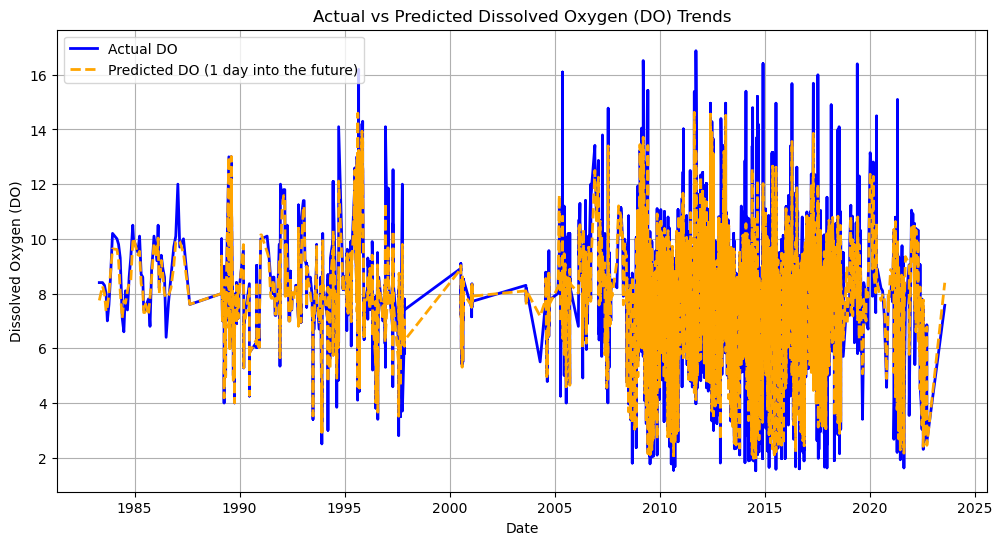

In [60]:
predicted_filtered_do_df = predicted_filtered_do_df.sort_values(by="ActivityStartDate")

plt.figure(figsize=(12, 6))  

plt.plot(predicted_filtered_do_df["ActivityStartDate"], 
         predicted_filtered_do_df["Dissolved oxygen (DO)"], 
         label="Actual DO", 
         color="blue", 
         linewidth=2)

plt.plot(predicted_filtered_do_df["ActivityStartDate"], 
         predicted_filtered_do_df["Predicted_DO(1 day into the future)"], 
         label="Predicted DO (1 day into the future)", 
         color="orange", 
         linestyle="--", 
         linewidth=2)

plt.xlabel("Date")
plt.ylabel("Dissolved Oxygen (DO)")
plt.title("Actual vs Predicted Dissolved Oxygen (DO) Trends")
plt.legend()
plt.grid(True)  

plt.show()

## pH Models <a id="ph-models"></a>

**Visualization 3**: Prediction Question 2: predicting `pH` based on inputs,`'Temperature, water', 'Turbidity', 'pH', 'Nitrate'`.

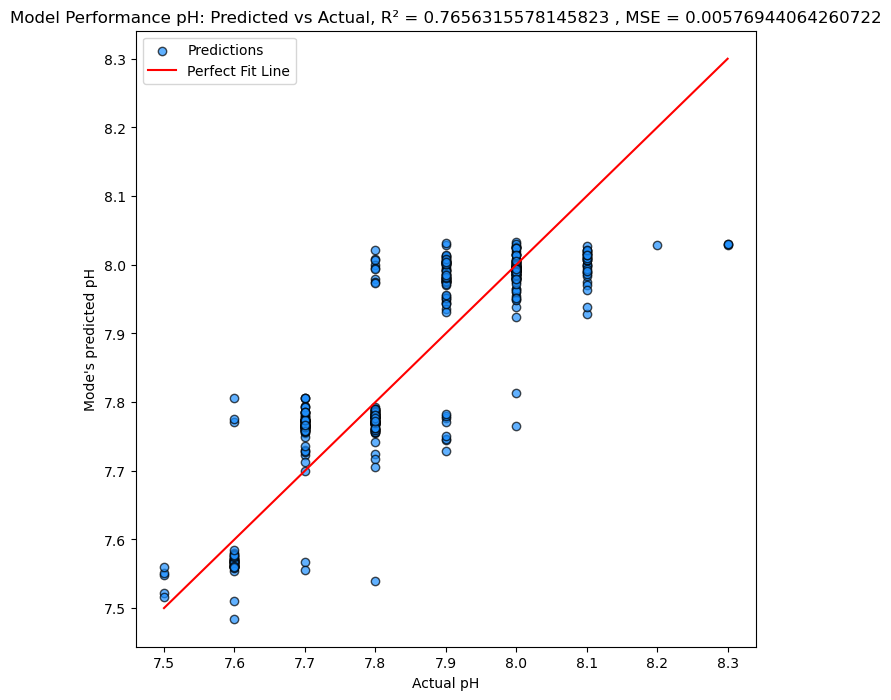

In [61]:
best_model_ridge_pH = models_pH[1]

y_val_pred = best_model_ridge_pH.predict(X_val_pH)

mse_val = mean_squared_error(y_val_pH, y_val_pred)
r2_val = r2_score(y_val_pH, y_val_pred)

plt.figure(figsize=(8, 8))
plt.scatter(y_val_pH, y_val_pred, color='dodgerblue', alpha=0.7, edgecolor='k', label='Predictions')
plt.plot([min(y_val_pH), max(y_val_pH)], [min(y_val_pH), max(y_val_pH)], color='red', label='Perfect Fit Line')
plt.xlabel("Actual pH")
plt.ylabel("Mode's predicted pH")
plt.title("Model Performance pH: Predicted vs Actual, R² = " + str(r2_val) + " , MSE = " + str(mse_val))
plt.legend()
plt.show()

## Magnesium Models <a id="magnesium-models"></a>

Visualization 4: Prediction Question 3: predicting Magnesium based on inputs,'Sodium', 'Sodium, percent total cations', 'Calcium', 'Potassium'.

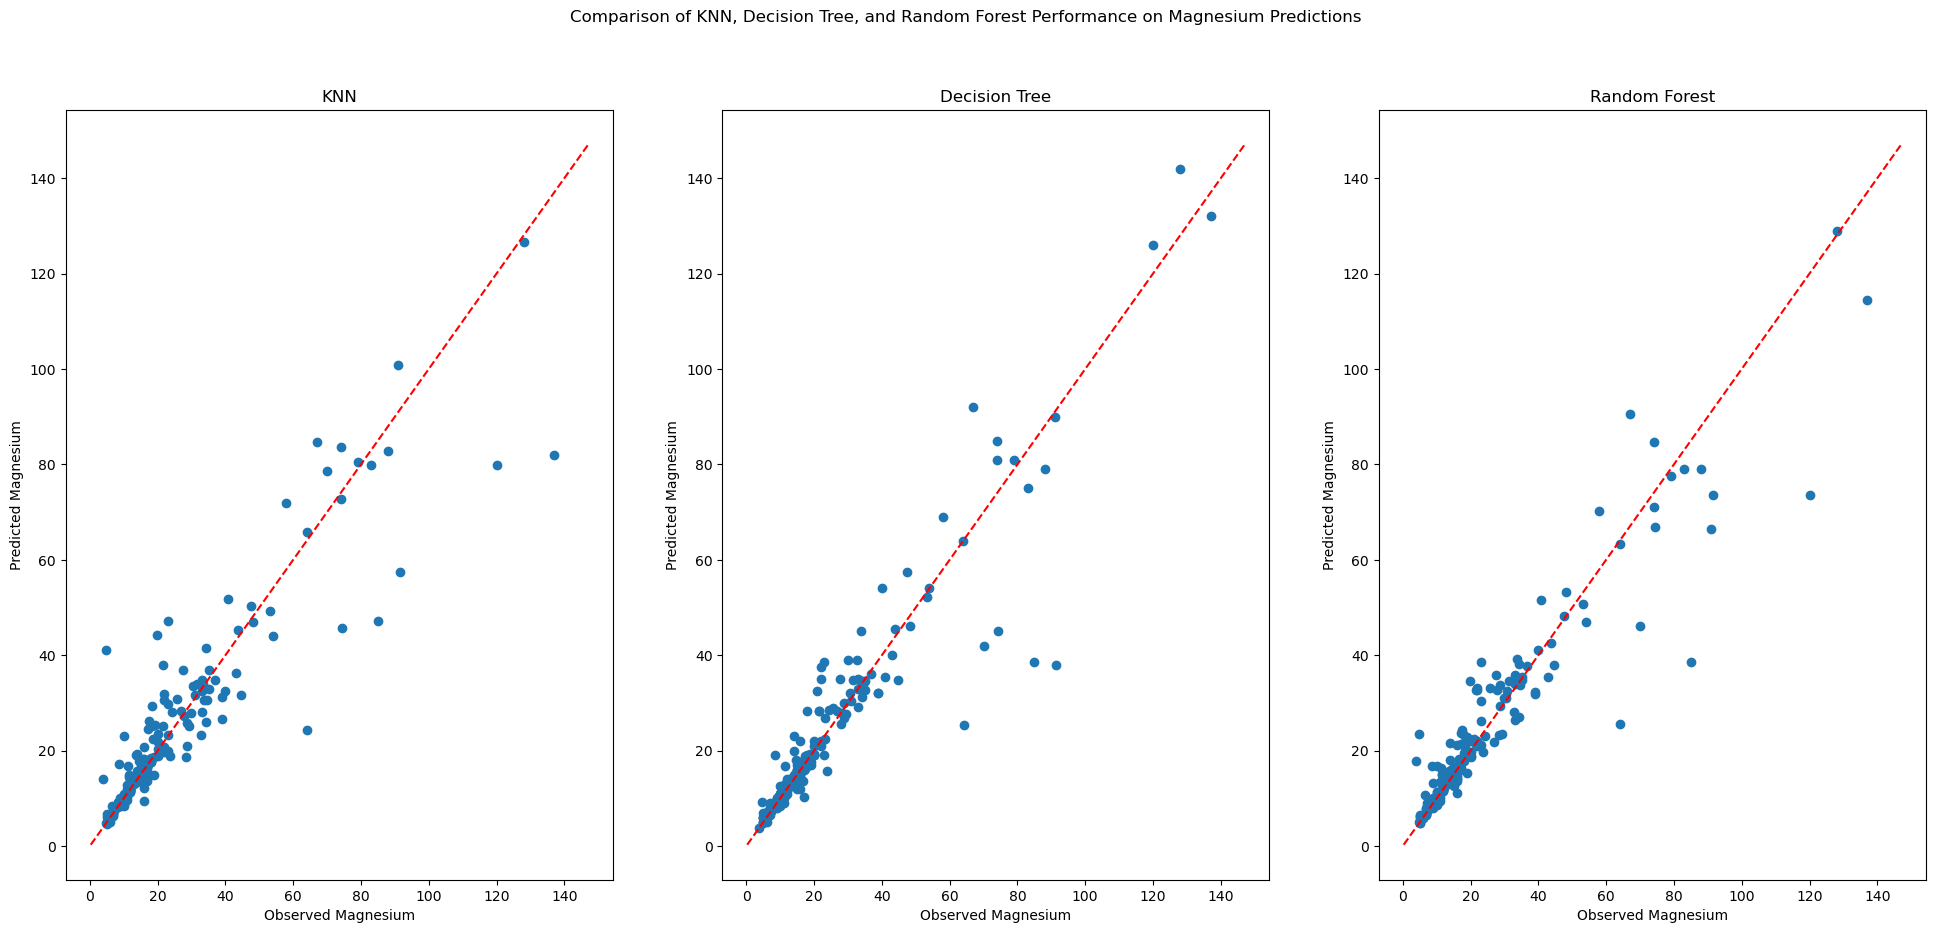

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(24, 10))

axes[0].scatter(y_test, y_pred)
axes[0].set_title("KNN")
axes[0].set_xlabel("Observed Magnesium")
axes[0].set_ylabel("Predicted Magnesium")
axes[0].plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle = '--')

axes[1].scatter(y_test, y_pred_dt)
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Observed Magnesium")
axes[1].set_ylabel("Predicted Magnesium")
axes[1].plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle = '--')


axes[2].scatter(y_test, rfpred)
axes[2].set_title("Random Forest")
axes[2].set_xlabel("Observed Magnesium")
axes[2].set_ylabel("Predicted Magnesium")
axes[2].plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle = '--')

plt.suptitle("Comparison of KNN, Decision Tree, and Random Forest Performance on Magnesium Predictions", fontsize=12)
plt.show()

These are the graphs of the performance of the models that we used. They go from least complicated on the left to most complicated on the right, going from kNN, to Decision Tree, then finally to our Random Forest model. Through this visualization, we can see that the performances for all three models are rather similar and predict the smaller values of magnesium very well. However, they struggle a little bit once they get past a certain magnesium value.

## Consolidated Prediction Model Results: Test Errors  <a id="all-models"></a>

| **Model**         | **pH Prediction**                                | **Dissolved Oxygen (DO) Prediction**                                       | **Magnesium Prediction**                        |
|--------------------|--------------------------------------------------|---------------------------------------------------------------------------|-----------------------------------------------|
| **OLS**           | **MSE: 0.00407331722118767**                     | **MAE: 1.3957, MSE: 16.7772, R2: -2.687**                                | **kNN**<br>MSE: 21.2206<br>R2: 0.7860          |
| **Ridge**         | **MSE: 0.004068937104284081**<br>**R2: 0.833**    | **Random Forests**<br>**MAE: 0.7962, MSE: 1.7457, R2: 0.6163**           | **Decision Tree**<br>MSE: 21.8006<br>R2: 0.7613 |
| **Lasso**         | **MSE: 0.02645262063805896**                     | **XGBoost Model**<br>**MAE: 0.8369, MSE: 1.8711, R2: 0.5891**            | **Random Forest**<br>MSE: 13.5997<br>R2: 0.8511 |
| **Elastic Net**   | **MSE: 0.019065317695427554**                    | -                                                                         | -                                             |

Best Models:
- For pH: Ridge
- For DO: Random Forests
- For Magnesium: Random Forests

We learned how to make this Markdown table from this [source](https://www.codecademy.com/resources/docs/markdown/tables).

---

# Interpretation and Conclusions (20 points) <a id="interpretation-and-conclusions-20-points"></a>

The main focus of our research was framed around our resource allocation question, which for us, was focused on figuring out where water quality management efforts should focus. Particularly, this is framed within the focus of infrastructure and water quality restoration. We aimed to find the answer to this question by predicting 3 water quality features, pH, Magnesium levels, and Dissolved Oxygen (DO) levels. We aim for our various models to be used to inform and guide decision making for improved water quality management.

**Dissolved Oxygen (DO) Prediction Summary**

The prediction of Dissolved Oxygen (DO) levels is crucial because DO is a key indicator of water health, directly influencing aquatic ecosystem health and water quality. For this task, we evaluated three models: **Random Forest**, **Linear Regression**, and **XGBoost**, using input features like temperature, pH, and nitrate levels to predict DO levels.The **Random Forest model** delivered the best results, with an **R² of 0.61**, meaning it explained 61% of the variation in DO levels. This makes the model actionable for resource allocation, enabling decision-makers to target areas where low DO levels are predicted and implement mitigation strategies effectively. The **Linear Regression model**, however, performed poorly with an **R² of -2.69**, failing to explain the variance in DO levels. This indicates that linear regression is not suitable for capturing the complexities in the dataset and cannot be relied upon for accurate predictions. **XGBoost**, while slightly less accurate than Random Forest with an **R² of 0.59**, remains a robust option for handling complex relationships in the data. However, it is not as actionable or interpretable as Random Forest in this case.


**pH Prediction Summary**

pH levels in water are another important indicator of water quality. In our analysis, we explored several models (Linear Regression, Lasso, Ridge, and Elastic Net) to predict pH levels, with Ridge Regression performing the best, yielding an $R^2$ value of 0.833. This means that Ridge Regression provided a good balance between bias and variance, making it a reliable model for identifying pH levels in water bodies. This model’s predictions are valuable in determining regions where pH levels may influence water treatment efficacy, which can guide investments in infrastructure. Here is the optimal model and its coefficients:



**Predicted pH Equation:**

$$
\text{pH}_{\text{predicted}} = c + (-0.14369 \cdot x_1) + (0.01172 \cdot x_2) + (-0.02924 \cdot x_3) + (0.00424 \cdot x_4)
$$

$$
+ (-0.03467 \cdot x_5)
$$

**Where:**  
- $c$: Intercept (bias term)  
- $x_1$ = Acidity, (H^+)  
- $x_2$ = Salinity
- $x_3$ = Light attenuation coefficient  
- $x_4$ = Temperature, water
- $x_5$ = Specific conductance


*We can see the different coefficients and how they relate each feature to the output.*
Models like the one developed above can help guide aquatic life preservation efforts, as pH levels directly impact aquatic ecosystems. Upon performing modeling prediction, we ran into difficulties regarding our datasets. Firstly, running the large amount of data on Datahub was difficult for some of us with computer storage limitations. Plus, the data from the dataset was in a challenging format, requiring lots of code to extract unit values and insights. Finally, not all observed measurements provided values for every feature. In the future, expanding our model to include a state with more water bodies (like Minnesota, for example) would benefit our model's growth and accuracy. 

**Magnesium Prediction Summary**

Magnesium levels are another important variable influencing water quality, especially water hardness. This model supports this and allows for magnesium levels to be predicted with decent accuracy (MSE’s below 25 and R2 scores above 0.75 for all three models: kNN, random forest, and decision tree), provided that there is data of minerals available. This will enable us to target regions with high magnesium levels since they especially require infrastructure to improve water quality. However, the effectiveness of this model is highly contingent on the availability of complete data, especially for other minerals. In addition, our model may be too simple; we really only use three other minerals. So while it performs well for our current data, if exposed to a large, unseen dataset, our model may struggle. In spite of this, given the proper data, our model could save time and money as water sites wouldn’t have to be tested that frequently, allowing for those resources to be invested elsewhere. In addition, as these mineral features are highly correlated (correlation scores of the minerals never went lower than 0.31), you could also use the model to predict the three other minerals using the same data.

**Resource Allocation Recommendations**

Based on our predictive models and external research, we recommend that decision-makers prioritize infrastructure investments in regions predicted to have low DO levels, high magnesium concentrations, and imbalanced pH levels. These regions will likely experience significant challenges in maintaining water quality, which could exacerbate environmental and health risks. Our model is able to be restructured into a GeoDataFrame, and create plots of areas where pH or other variables are imbalanced, showing certain regions in Alameda County need to have improved water quality processing methods, *directly addressing our resource allocation question*.

**Conclusion**

Our modeling results provide a solid foundation for prioritizing investments in water quality management across our focus region, the inner Bay Area. We highly recommend ridge regularization and Random Forests for predicting water quality characteristics. 
By focusing on areas with predicted low DO levels, high magnesium concentrations, and imbalanced pH levels, resources can be allocated more efficiently to improve water quality and support pre-existing environmental restoration efforts plus initiate new ones. For example, our analysis displayed that among our particular sites in Alameda County, the pH measurements of water exceeds 8, indicating drinkable water is far too basic for consumption, signaling water quality improvement efforts to be targeted here. However, it is essential to note that these models should be used alongside ongoing monitoring and real-time data updates to account for changing environmental conditions and any lack of complete data. Ultimately, our predictive models performed successfully and will aid in enhancing water quality management, improving public health, and protecting aquatic wildlife and environments in the Bay Area.


---

# Works Cited <a id="works-cited"></a>

1. **Water Quality Data**. "Water Quality Portal Description." Retrieved from: [https://www.waterqualitydata.us/wqp_description/](https://www.waterqualitydata.us/wqp_description/).

2. **World Health Organization (WHO)**. "pH in Drinking Water." Retrieved from: [https://cdn.who.int/media/docs/default-source/wash-documents/wash-chemicals/ph.pdf?sfvrsn=16b10656_4](https://cdn.who.int/media/docs/default-source/wash-documents/wash-chemicals/ph.pdf?sfvrsn=16b10656_4).

3. **Docs to Markdown**. "Create a Table of Contents in Markdown." Retrieved from: [https://www.docstomarkdown.pro/create-a-table-of-contents-in-markdown/](https://www.docstomarkdown.pro/create-a-table-of-contents-in-markdown/).

4. **California Open Data**. "CA Geographic Boundaries Dataset." Retrieved from: [https://data.ca.gov/dataset/ca-geographic-boundaries](https://data.ca.gov/dataset/ca-geographic-boundaries).

5. **Codecademy**. "Markdown Tables Documentation." Retrieved from: [https://www.codecademy.com/resources/docs/markdown/tables](https://www.codecademy.com/resources/docs/markdown/tables).

6. **U.S. Environmental Protection Agency (EPA)**. "The Effects of Dead Zones and Harmful Algal Blooms." Retrieved from: [https://www.epa.gov/nutrientpollution/effects-dead-zones-and-harmful-algal-blooms](https://www.epa.gov/nutrientpollution/effects-dead-zones-and-harmful-algal-blooms).


---